https://colab.research.google.com/github/NielsRogge/Transformers-Tutorials/blob/master/BERT/Fine_tuning_BERT_(and_friends)_for_multi_label_text_classification.ipynb

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
import pandas as pd
import re

In [3]:
df = pd.read_csv("./dataset/all_data_compile.csv")
df.head()

,Unnamed: 0,kementerian_nama,program,kegiatan,kro,ro,mp,pn,pp,kp,...,003.08,003.09,003.10,003.11,003.12,003.13,003.14,003.15,003.16,003.17
0,0,MAHKAMAH AGUNG,005.BF-Program Penegakan dan Pelayanan Hukum,1049-Peningkatan Manajemen Peradilan Umum,QBA-Layanan Bantuan Hukum Perseorangan,032-Pos Bantuan Hukum,NaN,07-Memperkuat Stabilitas Polhukhankam dan Tran...,03-Penegakan Hukum Nasional,04-Peningkatan Akses terhadap Keadilan,...,0,0,0,0,0,0,0,0,1,0
1,1,MAHKAMAH AGUNG,005.BF-Program Penegakan dan Pelayanan Hukum,1049-Peningkatan Manajemen Peradilan Umum,QCA-Perkara Hukum Perseorangan,001-Perkara Peradilan Umum yang diselesaikan m...,NaN,07-Memperkuat Stabilitas Polhukhankam dan Tran...,03-Penegakan Hukum Nasional,04-Peningkatan Akses terhadap Keadilan,...,0,0,0,0,0,0,0,0,1,0
2,2,MAHKAMAH AGUNG,005.BF-Program Penegakan dan Pelayanan Hukum,1049-Peningkatan Manajemen Peradilan Umum,QCA-Perkara Hukum Perseorangan,002-Sidang di luar Gedung Pengadilan,NaN,07-Memperkuat Stabilitas Polhukhankam dan Tran...,03-Penegakan Hukum Nasional,04-Peningkatan Akses terhadap Keadilan,...,0,0,0,0,0,0,0,0,1,0
3,3,MAHKAMAH AGUNG,005.BF-Program Penegakan dan Pelayanan Hukum,1053-Peningkatan Manajemen Peradilan Agama,QBA-Layanan Bantuan Hukum Perseorangan,003-Layanan bantuan hukum di Lingkungan Peradi...,NaN,07-Memperkuat Stabilitas Polhukhankam dan Tran...,03-Penegakan Hukum Nasional,04-Peningkatan Akses terhadap Keadilan,...,0,0,0,0,0,0,0,0,1,0
4,4,MAHKAMAH AGUNG,005.BF-Program Penegakan dan Pelayanan Hukum,1053-Peningkatan Manajemen Peradilan Agama,QCA-Perkara Hukum Perseorangan,001-Perkara di Lingkungan Peradilan Agama yang...,NaN,07-Memperkuat Stabilitas Polhukhankam dan Tran...,03-Penegakan Hukum Nasional,04-Peningkatan Akses terhadap Keadilan,...,0,0,0,0,0,0,0,0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4875 entries, 0 to 4874
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        4875 non-null   int64 
 1   kementerian_nama  4875 non-null   object
 2   program           4875 non-null   object
 3   kegiatan          4875 non-null   object
 4   kro               4875 non-null   object
 5   ro                4875 non-null   object
 6   mp                1215 non-null   object
 7   pn                3768 non-null   object
 8   pp                3768 non-null   object
 9   kp                3768 non-null   object
 10  pro_pn            3768 non-null   object
 11  satuan_kro        4875 non-null   object
 12  satuan_ro         4875 non-null   object
 13  tags              4875 non-null   object
 14  kode_tags         4875 non-null   object
 15  003.01            4875 non-null   int64 
 16  003.02            4875 non-null   int64 
 17  003.03        

In [5]:
selected_features = ['pn','program','kementerian_nama','pp','kegiatan','ro']

In [6]:
df['combined'] = df[selected_features].apply(lambda row: '. '.join(row.values.astype(str)), axis=1)

In [7]:
df['combined'][600]

'03-Meningkatkan Sumber Daya Manusia Berkualitas dan Berdaya Saing. 027.DQ-Program Perlindungan Sosial. KEMENTERIAN SOSIAL. 01-Pengendalian Penduduk dan Penguatan Tata Kelola Kependudukan. 6318-Pengelolaan Data Terpadu Kesejahteraan Sosial. 001-Data Terpadu Kesejahteraan Sosial'

In [8]:
# Define a function to clean the text
def clean_text(text):
    cleaned_text = text.lower()
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text.strip())
    cleaned_text = re.sub(r'\d+', '', cleaned_text)
    cleaned_text = re.sub(r'\.[a-zA-Z]{2}', '', cleaned_text)
    cleaned_text = cleaned_text.replace("-", " ")
    cleaned_text = ' '.join(cleaned_text.split())
    
    return cleaned_text

# Apply the cleaning function to the 'Text' column
df['combined'] = df['combined'].apply(clean_text)

In [9]:
df['combined'][100] 

'memperkuat ketahanan ekonomi untuk pertumbuhan yang berkualitas dan berkeadilan . program kebijakan fiskal. kementerian keuangan. pemenuhan kebutuhan energi dengan mengutamakan peningkatan energi baru terbarukan (ebt). formulasi kebijakan fiskal dan sektor keuangan. akselerasi pembangunan pembangkit energi terbarukan melalui kebijakan fiskal yang efektif (pn)'

In [10]:
unused_columns = ['Unnamed: 0', 'kementerian_nama','program','kegiatan',
                  'kro','ro','mp','pn','pp','kp','pro_pn','tags','kode_tags','satuan_ro','satuan_kro']
df.drop(unused_columns, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4875 entries, 0 to 4874
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   003.01    4875 non-null   int64 
 1   003.02    4875 non-null   int64 
 2   003.03    4875 non-null   int64 
 3   003.04    4875 non-null   int64 
 4   003.05    4875 non-null   int64 
 5   003.06    4875 non-null   int64 
 6   003.07    4875 non-null   int64 
 7   003.08    4875 non-null   int64 
 8   003.09    4875 non-null   int64 
 9   003.10    4875 non-null   int64 
 10  003.11    4875 non-null   int64 
 11  003.12    4875 non-null   int64 
 12  003.13    4875 non-null   int64 
 13  003.14    4875 non-null   int64 
 14  003.15    4875 non-null   int64 
 15  003.16    4875 non-null   int64 
 16  003.17    4875 non-null   int64 
 17  combined  4875 non-null   object
dtypes: int64(17), object(1)
memory usage: 685.7+ KB


# Checking English Content

In [11]:
from langdetect import detect_langs
from collections import Counter

In [12]:
# Create an empty counter for languages
language_counter = Counter()


# Define a function to detect languages with a threshold
def detect_languages_with_threshold(text, threshold=0.7):
    languages = detect_langs(text)
    for lang in languages:
        if lang.prob >= threshold:
            language_counter[lang.lang] += 1

# Apply the detect_languages_with_threshold function to your dataset column
df['combined'].apply(detect_languages_with_threshold)

# Print the language distribution
print("Language Distribution:")
for lang, count in language_counter.items():
    print(f"{lang}: {count}")

Language Distribution:
id: 4874


In [13]:
y_columns = list(set(df.columns.array) - set(['combined']))
y_columns 

['003.02',
 '003.11',
 '003.17',
 '003.14',
 '003.04',
 '003.10',
 '003.01',
 '003.12',
 '003.15',
 '003.16',
 '003.07',
 '003.03',
 '003.06',
 '003.05',
 '003.08',
 '003.09',
 '003.13']

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import gc

2024-02-01 17:16:20.814138: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-01 17:16:22.893206: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [15]:
df2 = df.copy()

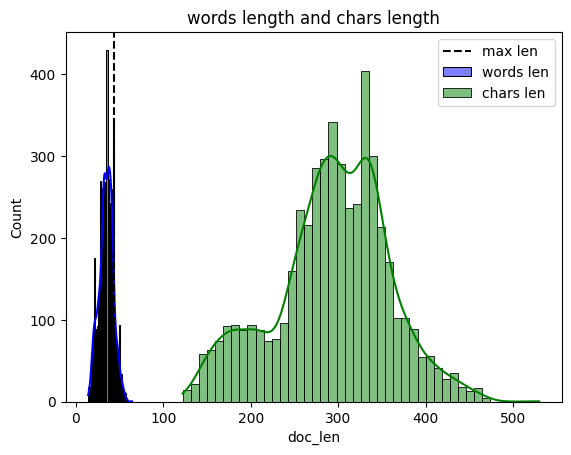

In [16]:
#visualize word distribution
df2['doc_len'] = df2['combined'].apply(lambda words: len(words.split(" ")))
df2['char_len'] = df2['combined'].apply(lambda words: len(words))
max_seq_len = np.round(df2['doc_len'].mean() + df2['doc_len'].std()).astype(int)

fig, ax = plt.subplots()
sns.histplot(df2, x='doc_len', kde=True, color='b', label='words len')
sns.histplot(df2, x='char_len', kde=True, color='g', label='chars len')

plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len')
plt.title('words length and chars length'); 
plt.legend()
plt.show()

In [58]:
# Calculate min, max, and average word length
min_word_len = df2['doc_len'].min()
max_word_len = df2['doc_len'].max()
avg_word_len = df2['doc_len'].mean()

print("Minimum word length:", min_word_len)
print("Maximum word length:", max_word_len)
print("Average word length:", avg_word_len)

Minimum word length: 14
Maximum word length: 64
Average word length: 34.6451282051282


In [15]:
#df.to_csv("sdgs_clean.csv")

In [17]:
X = df['combined'].copy()
y = df[y_columns].copy()

In [18]:
X.head()

0    memperkuat stabilitas polhukhankam dan transfo...
1    memperkuat stabilitas polhukhankam dan transfo...
2    memperkuat stabilitas polhukhankam dan transfo...
3    memperkuat stabilitas polhukhankam dan transfo...
4    memperkuat stabilitas polhukhankam dan transfo...
Name: combined, dtype: object

In [19]:
y.head()

,003.02,003.11,003.17,003.14,003.04,003.10,003.01,003.12,003.15,003.16,003.07,003.03,003.06,003.05,003.08,003.09,003.13
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [20]:
labels = [label for label in df.keys() if label not in ['combined']]
id2label = {idx:label for idx, label in enumerate(labels)}
label2id = {label:idx for idx, label in enumerate(labels)}
labels

['003.01',
 '003.02',
 '003.03',
 '003.04',
 '003.05',
 '003.06',
 '003.07',
 '003.08',
 '003.09',
 '003.10',
 '003.11',
 '003.12',
 '003.13',
 '003.14',
 '003.15',
 '003.16',
 '003.17']

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4875 entries, 0 to 4874
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   003.01    4875 non-null   int64 
 1   003.02    4875 non-null   int64 
 2   003.03    4875 non-null   int64 
 3   003.04    4875 non-null   int64 
 4   003.05    4875 non-null   int64 
 5   003.06    4875 non-null   int64 
 6   003.07    4875 non-null   int64 
 7   003.08    4875 non-null   int64 
 8   003.09    4875 non-null   int64 
 9   003.10    4875 non-null   int64 
 10  003.11    4875 non-null   int64 
 11  003.12    4875 non-null   int64 
 12  003.13    4875 non-null   int64 
 13  003.14    4875 non-null   int64 
 14  003.15    4875 non-null   int64 
 15  003.16    4875 non-null   int64 
 16  003.17    4875 non-null   int64 
 17  combined  4875 non-null   object
dtypes: int64(17), object(1)
memory usage: 685.7+ KB


In [22]:
from transformers import AutoTokenizer
import numpy as np
from transformers import TrainingArguments, Trainer
from transformers import AutoModelForSequenceClassification

from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from transformers import EvalPrediction
import torch

In [23]:

import re
def train_test_sdgs(model_name,dir_name,ds, epoch=2, report_to=None, save_to=None):
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    def preprocess_data(examples):
        # take a batch of texts
        text = examples["combined"]
        
        # encode them
        encoding = tokenizer(text, padding="max_length", truncation=True, max_length=128)
        # add labels
        labels_batch = {k: examples[k] for k in examples.keys() if k in labels}
        # create numpy array of shape (batch_size, num_labels)
        labels_matrix = np.zeros((len(text), len(labels)))
        # fill numpy array
        for idx, label in enumerate(labels):
            labels_matrix[:, idx] = labels_batch[label]

        encoding["labels"] = labels_matrix.tolist()
        
        return encoding
    
    # source: https://jesusleal.io/2021/04/21/Longformer-multilabel-classification/
    def multi_label_metrics(predictions, labels, threshold=0.5):
        # first, apply sigmoid on predictions which are of shape (batch_size, num_labels)
        sigmoid = torch.nn.Sigmoid()
        probs = sigmoid(torch.Tensor(predictions))
        # next, use threshold to turn them into integer predictions
        y_pred = np.zeros(probs.shape)
        y_pred[np.where(probs >= threshold)] = 1
        # finally, compute metrics
        y_true = labels
        f1_micro_average = f1_score(y_true=y_true, y_pred=y_pred, average='micro')
        f1_macro_average = f1_score(y_true=y_true, y_pred=y_pred, average='macro')
        roc_auc = roc_auc_score(y_true, y_pred, average = 'micro')
        accuracy = accuracy_score(y_true, y_pred)
        # return as dictionary
        metrics = {'f1_micro': f1_micro_average,
                'f1_macro': f1_macro_average,
                'roc_auc': roc_auc,
                'accuracy': accuracy}
        return metrics
    
    def compute_metrics(p: EvalPrediction):
        preds = p.predictions[0] if isinstance(p.predictions, 
                tuple) else p.predictions
        result = multi_label_metrics(
            predictions=preds, 
            labels=p.label_ids)
        return result
    
    batch_size = 64
    metric_name = "f1_macro"
    
    encoded_dataset = ds.map(preprocess_data, batched=True, remove_columns=ds['train'].column_names)
    encoded_dataset.set_format("torch")
    
    args = TrainingArguments(
        dir_name,
        evaluation_strategy = "epoch",
        save_strategy = "epoch",
        save_total_limit=1,
        learning_rate=2e-5,
        #optim='adamw_torch', 
        #lr_scheduler_type='linear',
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        num_train_epochs=epoch,
        weight_decay=0.1,
        load_best_model_at_end=True,
        metric_for_best_model=metric_name,
        report_to=report_to,  # Use wandb for reporting
        do_train=True,
        do_eval=True,
        #push_to_hub=True,
    )
    
    model = AutoModelForSequenceClassification.from_pretrained(model_name, 
                                                        problem_type="multi_label_classification", 
                                                        num_labels=len(labels),
                                                        id2label=id2label,
                                                        label2id=label2id)
    
    trainer = Trainer(
        model,
        args,
        train_dataset=encoded_dataset["train"],
        #test_dataset=encoded_dataset["test"],
        eval_dataset=encoded_dataset["valid"],
        tokenizer=tokenizer,
        compute_metrics=compute_metrics

    )
    
    trainer.train()
    print("Start Evaluation")
    evaluation_result = trainer.evaluate() #encoded_dataset["test"])
    print(evaluation_result)
    
    #if save_to is not None:
    #    trainer.save_model(save_to) 
    
    return evaluation_result


In [24]:
from datasets import *
dataset = Dataset.from_pandas(df)
from sklearn.model_selection import KFold

In [25]:
train_testvalid = dataset.train_test_split(test_size=0.4)
# Split the 10% test + valid in half test, half valid
test_valid = train_testvalid['test'].train_test_split(test_size=0.2)
# gather everyone if you want to have a single DatasetDict
ds = DatasetDict({
    'train': test_valid['train'],
    'valid': test_valid['test'],
    'test': train_testvalid['train']})

In [26]:
ds

DatasetDict({
    train: Dataset({
        features: ['003.01', '003.02', '003.03', '003.04', '003.05', '003.06', '003.07', '003.08', '003.09', '003.10', '003.11', '003.12', '003.13', '003.14', '003.15', '003.16', '003.17', 'combined'],
        num_rows: 1560
    })
    valid: Dataset({
        features: ['003.01', '003.02', '003.03', '003.04', '003.05', '003.06', '003.07', '003.08', '003.09', '003.10', '003.11', '003.12', '003.13', '003.14', '003.15', '003.16', '003.17', 'combined'],
        num_rows: 390
    })
    test: Dataset({
        features: ['003.01', '003.02', '003.03', '003.04', '003.05', '003.06', '003.07', '003.08', '003.09', '003.10', '003.11', '003.12', '003.13', '003.14', '003.15', '003.16', '003.17', 'combined'],
        num_rows: 2925
    })
})

In [27]:
binary_values = [ds['train'][key] for key in ds['train'].column_names if key.startswith('003.')]


In [28]:
for row in ds['train']:
    binary_values = [row[key] for key in row if key.startswith('003.')]
    print(binary_values)

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0,

In [29]:
dataset

Dataset({
    features: ['003.01', '003.02', '003.03', '003.04', '003.05', '003.06', '003.07', '003.08', '003.09', '003.10', '003.11', '003.12', '003.13', '003.14', '003.15', '003.16', '003.17', 'combined'],
    num_rows: 4875
})

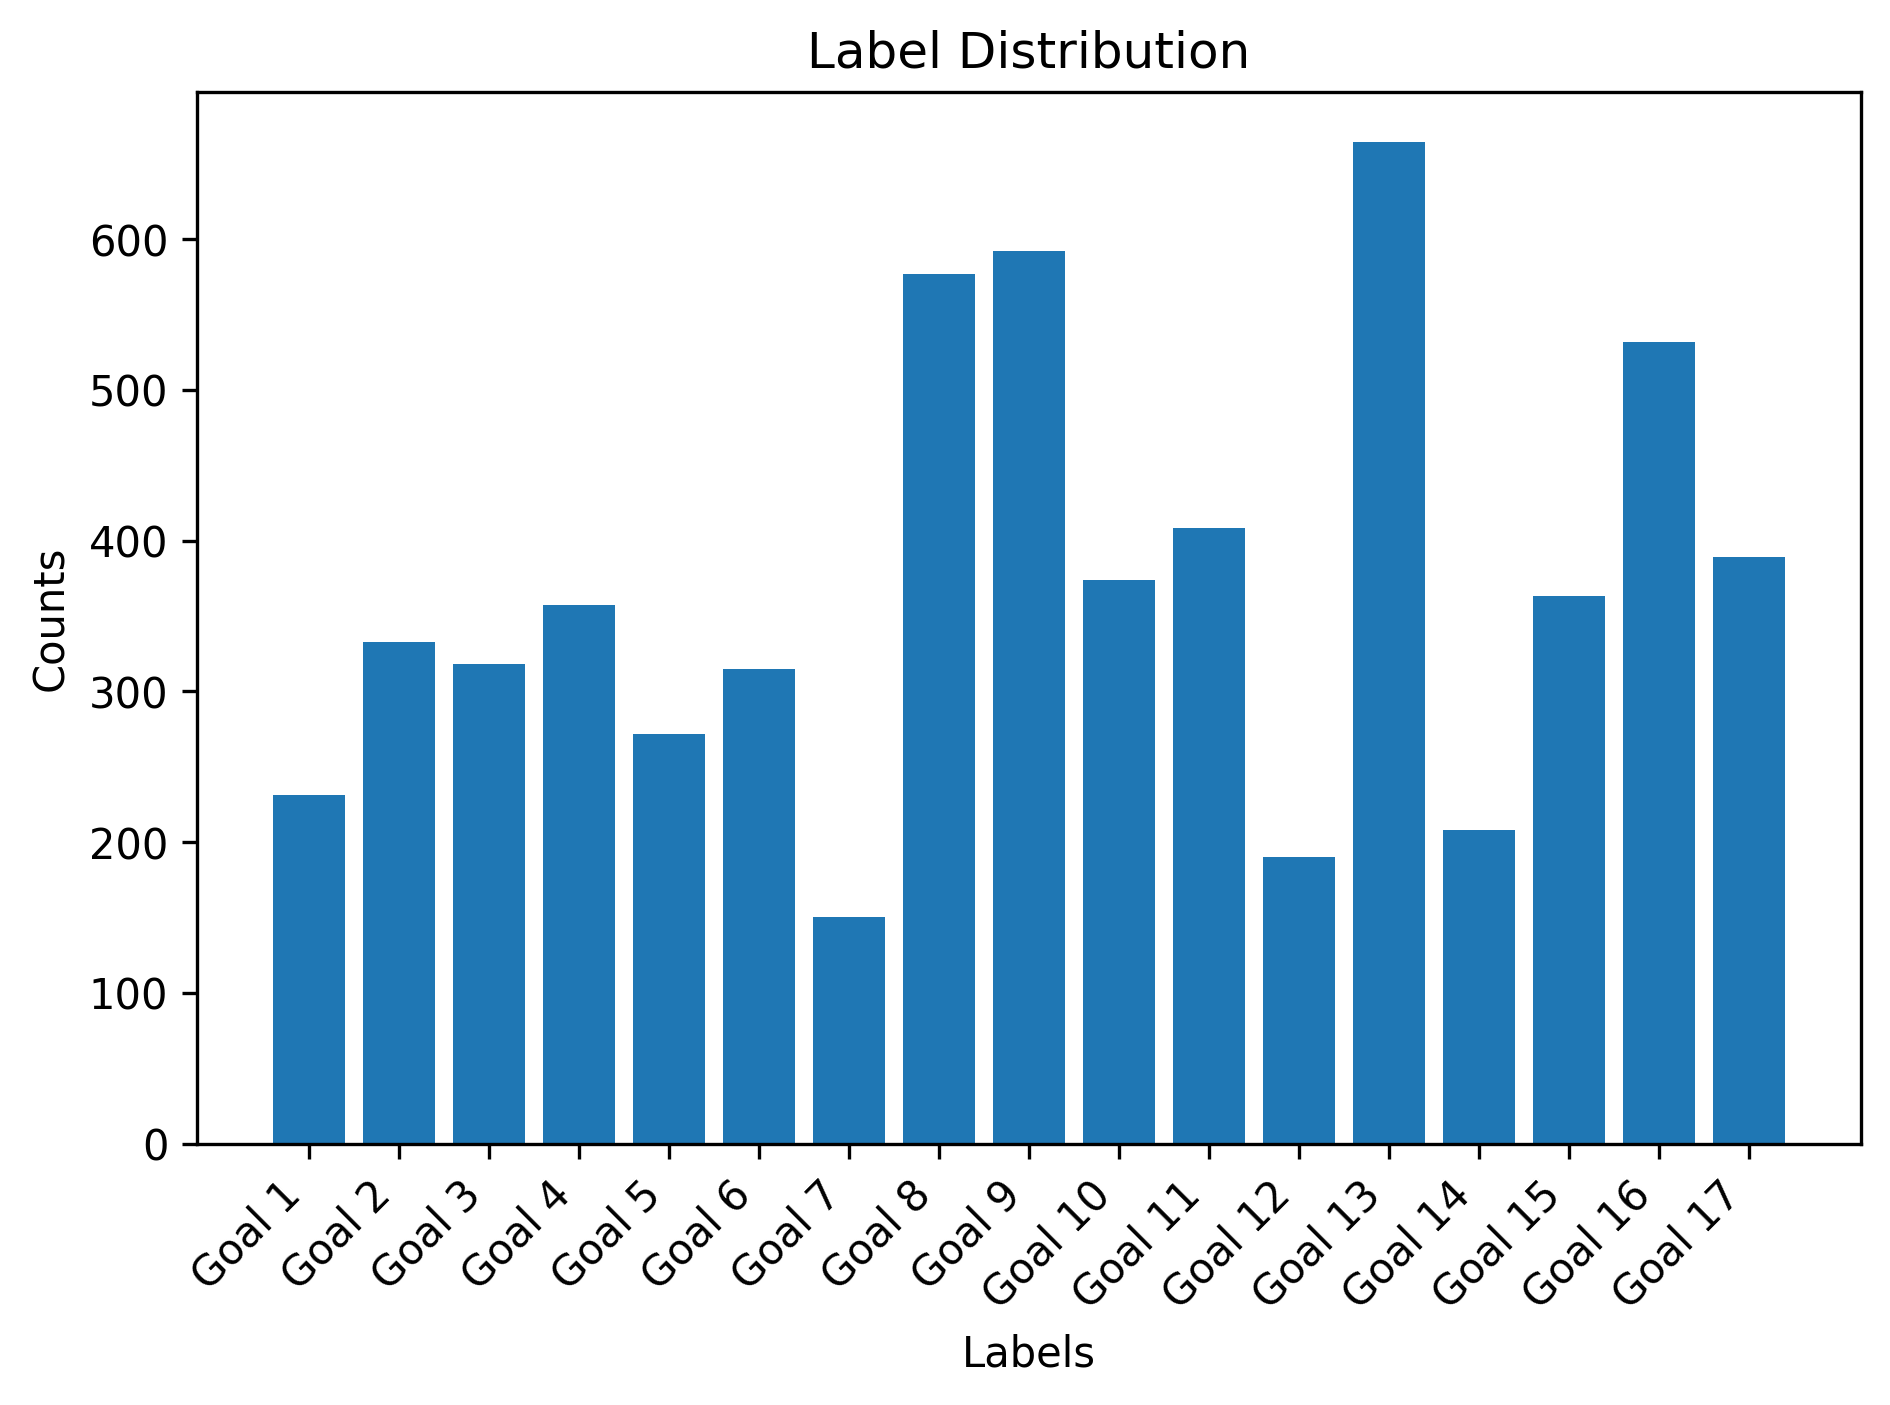

In [30]:
# Filter out the 'combined' feature and keep only numerical features
numerical_features = [feature for feature in dataset.features if feature != 'combined']

# Calculate the count of value 1 for each feature
count_of_ones = [np.sum(dataset[feature]) for feature in numerical_features]

# Format the numerical feature names as '001', '002', '003', etc.
formatted_feature_names = [f"Goal {str(i + 1)}" for i in range(len(numerical_features))]

plt.bar(formatted_feature_names, count_of_ones)
plt.title("Label Distribution")
plt.xlabel("Labels")
plt.ylabel("Counts")

plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Manually set the DPI when displaying the plot
plt.gcf().set_dpi(300)

plt.show()

In [31]:
def train_sdgs_kfold_real(model, model_name, my_dataset):
    hasil = []
    
    train_testvalid = dataset.train_test_split(test_size=0.2,seed=42,shuffle=True)
    folds = KFold(n_splits=5,random_state=42,shuffle=True)
    splits = folds.split(np.zeros(train_testvalid['train'].num_rows))
    n=1
    for train_idxs, val_idxs in splits:
        ds = DatasetDict({
            'train': train_testvalid['train'].select(train_idxs),
            'test': train_testvalid['train'].select(val_idxs),
            'valid': train_testvalid['test']})
        print(ds)
        
        hasil.append(train_test_sdgs(model,
                    f"model/{model_name}{n}",ds))
        n+=1
    print(hasil)
    return hasil

In [33]:
def train_sdgs_kfold_real3(my_dataset, models):
    hasil1 = []
    hasil2 = []
    hasil3 = []
    hasil4 = []
    hasil5 = []
    hasil6 = []
    hasil7 = []
    
    # Initialize KFold with 5 splits
    folds = KFold(n_splits=5, random_state=42, shuffle=True)
    splits = folds.split(np.zeros(my_dataset.num_rows))
    n=1
    for train_idxs, val_idxs in splits:
        ds = DatasetDict({
            'train': my_dataset.select(train_idxs),
            'valid': my_dataset.select(val_idxs)})
        print(ds)
        
        print("model 1-", n)
        hasil1.append(train_test_sdgs(models[0],
                    f"models/model1-{n}",ds))
        
        print("model 2-", n)
        hasil2.append(train_test_sdgs(models[1],
                    f"models/model2-{n}",ds))
        
        print("model 3-", n)
        hasil3.append(train_test_sdgs(models[2],
                    f"models/model3-{n}",ds))
        
        print("model 4-", n)
        hasil4.append(train_test_sdgs(models[3],
                    f"models/model4-{n}",ds))
        
        print("model 5-", n)
        hasil5.append(train_test_sdgs(models[4],
                    f"models/model5-{n}",ds))
        
        print("model 6-", n)
        hasil6.append(train_test_sdgs(models[5],
                    f"models/model6-{n}",ds))
        
        print("model 7-", n)
        hasil7.append(train_test_sdgs(models[6],
                    f"models/model7-{n}",ds))
        n+=1
    print(hasil1,hasil2,hasil3,hasil4,hasil5,hasil6,hasil7)
    return hasil1,hasil2,hasil3,hasil4,hasil5,hasil6,hasil7

In [48]:
def train_sdgs_kfold_real3(my_dataset, models):
    hasil1 = []
    hasil2 = []
    hasil3 = []
    hasil4 = []
    hasil5 = []
    
    # Initialize KFold with 5 splits
    folds = KFold(n_splits=5, random_state=42, shuffle=True)
    splits = folds.split(np.zeros(my_dataset.num_rows))
    n=1
    for train_idxs, val_idxs in splits:
        ds = DatasetDict({
            'train': my_dataset.select(train_idxs),
            'valid': my_dataset.select(val_idxs)})
        print(ds)
        
        print("model 1-", n)
        hasil1.append(train_test_sdgs(models[0],
                    f"models/model1-{n}",ds))
        
        print("model 2-", n)
        hasil2.append(train_test_sdgs(models[1],
                    f"models/model2-{n}",ds))
        
        print("model 3-", n)
        hasil3.append(train_test_sdgs(models[2],
                    f"models/model3-{n}",ds))
        
        print("model 4-", n)
        hasil4.append(train_test_sdgs(models[3],
                    f"models/model4-{n}",ds))
        
        print("model 5-", n)
        hasil5.append(train_test_sdgs(models[4],
                    f"models/model5-{n}",ds))
        
        
        n+=1
    print(hasil1,hasil2,hasil3,hasil4,hasil5)
    return hasil1,hasil2,hasil3,hasil4,hasil5

In [65]:
def train_sdgs_kfold_real3(my_dataset, models):
    hasil1 = []
    hasil2 = []
    
    # Initialize KFold with 5 splits
    folds = KFold(n_splits=5, random_state=42, shuffle=True)
    splits = folds.split(np.zeros(my_dataset.num_rows))
    n=1
    for train_idxs, val_idxs in splits:
        ds = DatasetDict({
            'train': my_dataset.select(train_idxs),
            'valid': my_dataset.select(val_idxs)})
        print(ds)
        
        print("model 1-", n)
        hasil1.append(train_test_sdgs(models[0],
                    f"models/model1-{n}",ds))
        
        print("model 2-", n)
        hasil2.append(train_test_sdgs(models[1],
                    f"models/model2-{n}",ds))
        
        
        n+=1
    print(hasil1,hasil2)
    return hasil1,hasil2

In [34]:
import scipy.stats as stats


In [61]:
def draw_comparison_pvalue(list_hasil, ylabel, width=10):
    fig,ax = plt.subplots(dpi=300)
    fig.set_figwidth(width)

    for i,(key,value) in enumerate(list_hasil.items()):
        if (i==0):
            to_compare = value
        else:
            data = [to_compare, value]
            t_stat, p_value = stats.ttest_ind(to_compare, value)
            x_pos = i  # X-coordinate position of the p-value text
            y_pos = np.max(np.concatenate(data))  # Y-coordinate position of the p-value text
            plt.text(x_pos, y_pos, f'p-value = {p_value:.4f}', ha='center')
            print(data)

        print(i,key,value)
        ax.boxplot(value,positions=[i])

    plt.xticks([i for i in range(len(list_hasil))], list_hasil.keys())
    ax.set_ylabel(ylabel=ylabel)
    ax.set_xlabel("Models")
    plt.show()

In [63]:
def draw_comparison(list_hasil, ylabel, width=10):
    fig,ax = plt.subplots(dpi=300)
    fig.set_figwidth(width)

    for i,(key,value) in enumerate(list_hasil.items()):
        if (i==0):
            to_compare = value
        else:
            data = [to_compare, value]
            t_stat, p_value = stats.ttest_ind(to_compare, value)
            x_pos = i  # X-coordinate position of the p-value text
            y_pos = np.max(np.concatenate(data))  # Y-coordinate position of the p-value text
            #plt.text(x_pos, y_pos, f'p-value = {p_value:.4f}', ha='center')
            #print(data)

        print(i,key,value)
        ax.boxplot(value,positions=[i], showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "5"})

    plt.xticks([i for i in range(len(list_hasil))], list_hasil.keys())
    ax.set_ylabel(ylabel=ylabel)
    ax.set_xlabel("Models")
    #ax.grid()
    plt.show()

In [37]:
def grab_roc_auc(list_model,n_item):
    hasil=[]
    for x in range(n_item):
        hasil.append(list_model[x]["eval_roc_auc"])
    return hasil

In [38]:
def grab_f1_macro(list_model,n_item):
    hasil=[]
    for x in range(n_item):
        hasil.append(list_model[x]["eval_f1_macro"])
    return hasil

In [39]:
import wandb
wandb.init(project="huggingface")


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


wandb: Currently logged in as: just-108 (cofog). Use `wandb login --relogin` to force relogin


# Final 25

In [40]:
models_25 = ["indolem/indobert-base-uncased",
            "sarahlintang/IndoBERT",
            "cahya/bert-base-indonesian-522M",
            "indobenchmark/indobert-base-p2",
            "../../script/IndoGovBERT-final/models/persuratan-final-25/",
            "../../script/IndoGovBERT-final/models/peraturan-final-25/",
            "../../script/IndoGovBERT-final/models/all-final-25/",
            ]
x25_1,x25_2,x25_3,x25_4,x25_5,x25_6,x25_7 = train_sdgs_kfold_real3(dataset, models_25)

DatasetDict({
    train: Dataset({
        features: ['003.01', '003.02', '003.03', '003.04', '003.05', '003.06', '003.07', '003.08', '003.09', '003.10', '003.11', '003.12', '003.13', '003.14', '003.15', '003.16', '003.17', 'combined'],
        num_rows: 3900
    })
    valid: Dataset({
        features: ['003.01', '003.02', '003.03', '003.04', '003.05', '003.06', '003.07', '003.08', '003.09', '003.10', '003.11', '003.12', '003.13', '003.14', '003.15', '003.16', '003.17', 'combined'],
        num_rows: 975
    })
})
model 1- 1


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at indolem/indobert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indober

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.20545673370361328, 'eval_f1_micro': 0.24121295658166783, 'eval_f1_macro': 0.133058214945979, 'eval_roc_auc': 0.5690128209712514, 'eval_accuracy': 0.12717948717948718, 'eval_runtime': 0.8473, 'eval_samples_per_second': 1150.714, 'eval_steps_per_second': 18.884, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.16285482048988342, 'eval_f1_micro': 0.5945657964837506, 'eval_f1_macro': 0.3905370869176951, 'eval_roc_auc': 0.7200774879702696, 'eval_accuracy': 0.41743589743589743, 'eval_runtime': 0.8457, 'eval_samples_per_second': 1152.853, 'eval_steps_per_second': 18.919, 'epoch': 2.0}
{'train_runtime': 41.7527, 'train_samples_per_second': 186.814, 'train_steps_per_second': 2.922, 'train_loss': 0.23244235554679496, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.16285482048988342, 'eval_f1_micro': 0.5945657964837506, 'eval_f1_macro': 0.3905370869176951, 'eval_roc_auc': 0.7200774879702696, 'eval_accuracy': 0.41743589743589743, 'eval_runtime': 0.8621, 'eval_samples_per_second': 1131.002, 'eval_steps_per_second': 18.56, 'epoch': 2.0}
model 2- 1


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at sarahlintang/IndoBERT were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not init

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.16884298622608185, 'eval_f1_micro': 0.5968699406368052, 'eval_f1_macro': 0.4327992344027456, 'eval_roc_auc': 0.7187071870284727, 'eval_accuracy': 0.4, 'eval_runtime': 0.8567, 'eval_samples_per_second': 1138.023, 'eval_steps_per_second': 18.675, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13569515943527222, 'eval_f1_micro': 0.7217898832684825, 'eval_f1_macro': 0.6330989958783304, 'eval_roc_auc': 0.7934890916446542, 'eval_accuracy': 0.5312820512820513, 'eval_runtime': 0.8474, 'eval_samples_per_second': 1150.527, 'eval_steps_per_second': 18.88, 'epoch': 2.0}
{'train_runtime': 42.8198, 'train_samples_per_second': 182.159, 'train_steps_per_second': 2.849, 'train_loss': 0.20579100436851627, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13569515943527222, 'eval_f1_micro': 0.7217898832684825, 'eval_f1_macro': 0.6330989958783304, 'eval_roc_auc': 0.7934890916446542, 'eval_accuracy': 0.5312820512820513, 'eval_runtime': 0.8784, 'eval_samples_per_second': 1109.942, 'eval_steps_per_second': 18.214, 'epoch': 2.0}
model 3- 1


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at cahya/bert-base-indonesian-522M were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cahya/bert-ba

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.16676932573318481, 'eval_f1_micro': 0.596903363587827, 'eval_f1_macro': 0.40996498121510555, 'eval_roc_auc': 0.7206387731733167, 'eval_accuracy': 0.42256410256410254, 'eval_runtime': 0.8506, 'eval_samples_per_second': 1146.211, 'eval_steps_per_second': 18.81, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13337938487529755, 'eval_f1_micro': 0.7422969187675071, 'eval_f1_macro': 0.6585721081597165, 'eval_roc_auc': 0.8135107239542253, 'eval_accuracy': 0.5528205128205128, 'eval_runtime': 0.8539, 'eval_samples_per_second': 1141.875, 'eval_steps_per_second': 18.738, 'epoch': 2.0}
{'train_runtime': 38.9221, 'train_samples_per_second': 200.401, 'train_steps_per_second': 3.134, 'train_loss': 0.2047814853855821, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13337938487529755, 'eval_f1_micro': 0.7422969187675071, 'eval_f1_macro': 0.6585721081597165, 'eval_roc_auc': 0.8135107239542253, 'eval_accuracy': 0.5528205128205128, 'eval_runtime': 0.8508, 'eval_samples_per_second': 1145.995, 'eval_steps_per_second': 18.806, 'epoch': 2.0}
model 4- 1


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/media/agus/DATA/DDALM/venv_sdgs/lib/python3.9/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.161716490983963, 'eval_f1_micro': 0.6259863229879011, 'eval_f1_macro': 0.46923172151851417, 'eval_roc_auc': 0.7352310970141154, 'eval_accuracy': 0.4430769230769231, 'eval_runtime': 0.8506, 'eval_samples_per_second': 1146.308, 'eval_steps_per_second': 18.811, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.12992992997169495, 'eval_f1_micro': 0.7361904761904763, 'eval_f1_macro': 0.6566212673041063, 'eval_roc_auc': 0.8054055462950759, 'eval_accuracy': 0.5405128205128205, 'eval_runtime': 0.8525, 'eval_samples_per_second': 1143.646, 'eval_steps_per_second': 18.768, 'epoch': 2.0}
{'train_runtime': 45.3159, 'train_samples_per_second': 172.125, 'train_steps_per_second': 2.692, 'train_loss': 0.19801635429507397, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.12992992997169495, 'eval_f1_micro': 0.7361904761904763, 'eval_f1_macro': 0.6566212673041063, 'eval_roc_auc': 0.8054055462950759, 'eval_accuracy': 0.5405128205128205, 'eval_runtime': 0.8735, 'eval_samples_per_second': 1116.153, 'eval_steps_per_second': 18.316, 'epoch': 2.0}
model 5- 1


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/persuratan-final-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model 

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.14623872935771942, 'eval_f1_micro': 0.7110685194058458, 'eval_f1_macro': 0.6222762234569756, 'eval_roc_auc': 0.7924772762520046, 'eval_accuracy': 0.5394871794871795, 'eval_runtime': 0.8513, 'eval_samples_per_second': 1145.275, 'eval_steps_per_second': 18.794, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.12081016600131989, 'eval_f1_micro': 0.7518587360594795, 'eval_f1_macro': 0.6907644926029817, 'eval_roc_auc': 0.8192145291867265, 'eval_accuracy': 0.5846153846153846, 'eval_runtime': 0.8623, 'eval_samples_per_second': 1130.644, 'eval_steps_per_second': 18.554, 'epoch': 2.0}
{'train_runtime': 44.3069, 'train_samples_per_second': 176.045, 'train_steps_per_second': 2.754, 'train_loss': 0.18274224390749072, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.12081016600131989, 'eval_f1_micro': 0.7518587360594795, 'eval_f1_macro': 0.6907644926029817, 'eval_roc_auc': 0.8192145291867265, 'eval_accuracy': 0.5846153846153846, 'eval_runtime': 0.8484, 'eval_samples_per_second': 1149.266, 'eval_steps_per_second': 18.86, 'epoch': 2.0}
model 6- 1


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/peraturan-final-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model c

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.15949079394340515, 'eval_f1_micro': 0.6206533192834562, 'eval_f1_macro': 0.4790816542153061, 'eval_roc_auc': 0.7327446443636249, 'eval_accuracy': 0.441025641025641, 'eval_runtime': 0.8382, 'eval_samples_per_second': 1163.276, 'eval_steps_per_second': 19.09, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.12787272036075592, 'eval_f1_micro': 0.731244064577398, 'eval_f1_macro': 0.6723908669722496, 'eval_roc_auc': 0.8039175259232219, 'eval_accuracy': 0.5446153846153846, 'eval_runtime': 0.8482, 'eval_samples_per_second': 1149.442, 'eval_steps_per_second': 18.863, 'epoch': 2.0}
{'train_runtime': 40.4879, 'train_samples_per_second': 192.65, 'train_steps_per_second': 3.013, 'train_loss': 0.19513436614489946, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.12787272036075592, 'eval_f1_micro': 0.731244064577398, 'eval_f1_macro': 0.6723908669722496, 'eval_roc_auc': 0.8039175259232219, 'eval_accuracy': 0.5446153846153846, 'eval_runtime': 0.8552, 'eval_samples_per_second': 1140.122, 'eval_steps_per_second': 18.71, 'epoch': 2.0}
model 7- 1


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/all-final-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpo

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.16888099908828735, 'eval_f1_micro': 0.592, 'eval_f1_macro': 0.40164204145304655, 'eval_roc_auc': 0.7188505812481316, 'eval_accuracy': 0.4317948717948718, 'eval_runtime': 0.8662, 'eval_samples_per_second': 1125.597, 'eval_steps_per_second': 18.471, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13386236131191254, 'eval_f1_micro': 0.7228571428571429, 'eval_f1_macro': 0.6399103368547288, 'eval_roc_auc': 0.7993753490004295, 'eval_accuracy': 0.5405128205128205, 'eval_runtime': 0.8827, 'eval_samples_per_second': 1104.605, 'eval_steps_per_second': 18.127, 'epoch': 2.0}
{'train_runtime': 46.533, 'train_samples_per_second': 167.623, 'train_steps_per_second': 2.622, 'train_loss': 0.20346763485767802, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13386236131191254, 'eval_f1_micro': 0.7228571428571429, 'eval_f1_macro': 0.6399103368547288, 'eval_roc_auc': 0.7993753490004295, 'eval_accuracy': 0.5405128205128205, 'eval_runtime': 0.8497, 'eval_samples_per_second': 1147.468, 'eval_steps_per_second': 18.83, 'epoch': 2.0}
DatasetDict({
    train: Dataset({
        features: ['003.01', '003.02', '003.03', '003.04', '003.05', '003.06', '003.07', '003.08', '003.09', '003.10', '003.11', '003.12', '003.13', '003.14', '003.15', '003.16', '003.17', 'combined'],
        num_rows: 3900
    })
    valid: Dataset({
        features: ['003.01', '003.02', '003.03', '003.04', '003.05', '003.06', '003.07', '003.08', '003.09', '003.10', '003.11', '003.12', '003.13', '003.14', '003.15', '003.16', '003.17', 'combined'],
        num_rows: 975
    })
})
model 1- 2


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at indolem/indobert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indober

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.2080533504486084, 'eval_f1_micro': 0.1717171717171717, 'eval_f1_macro': 0.08478760637447368, 'eval_roc_auc': 0.5470736173657448, 'eval_accuracy': 0.04923076923076923, 'eval_runtime': 0.8535, 'eval_samples_per_second': 1142.418, 'eval_steps_per_second': 18.747, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.1664573848247528, 'eval_f1_micro': 0.562296858071506, 'eval_f1_macro': 0.3504649583154045, 'eval_roc_auc': 0.7057592404844426, 'eval_accuracy': 0.36, 'eval_runtime': 0.8687, 'eval_samples_per_second': 1122.34, 'eval_steps_per_second': 18.418, 'epoch': 2.0}
{'train_runtime': 40.792, 'train_samples_per_second': 191.214, 'train_steps_per_second': 2.991, 'train_loss': 0.23495372397000672, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.1664573848247528, 'eval_f1_micro': 0.562296858071506, 'eval_f1_macro': 0.3504649583154045, 'eval_roc_auc': 0.7057592404844426, 'eval_accuracy': 0.36, 'eval_runtime': 0.8464, 'eval_samples_per_second': 1151.992, 'eval_steps_per_second': 18.904, 'epoch': 2.0}
model 2- 2


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at sarahlintang/IndoBERT were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not init

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.1711786985397339, 'eval_f1_micro': 0.5816993464052287, 'eval_f1_macro': 0.4135981905649398, 'eval_roc_auc': 0.712598731520996, 'eval_accuracy': 0.37538461538461537, 'eval_runtime': 0.8695, 'eval_samples_per_second': 1121.36, 'eval_steps_per_second': 18.402, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13746830821037292, 'eval_f1_micro': 0.7070408665681929, 'eval_f1_macro': 0.6195531032660946, 'eval_roc_auc': 0.7861355402038683, 'eval_accuracy': 0.5025641025641026, 'eval_runtime': 0.8557, 'eval_samples_per_second': 1139.362, 'eval_steps_per_second': 18.697, 'epoch': 2.0}
{'train_runtime': 40.1494, 'train_samples_per_second': 194.274, 'train_steps_per_second': 3.039, 'train_loss': 0.2068996898463515, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13746830821037292, 'eval_f1_micro': 0.7070408665681929, 'eval_f1_macro': 0.6195531032660946, 'eval_roc_auc': 0.7861355402038683, 'eval_accuracy': 0.5025641025641026, 'eval_runtime': 0.853, 'eval_samples_per_second': 1143.073, 'eval_steps_per_second': 18.758, 'epoch': 2.0}
model 3- 2


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at cahya/bert-base-indonesian-522M were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cahya/bert-ba

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.17041806876659393, 'eval_f1_micro': 0.6022187004754358, 'eval_f1_macro': 0.4143062859330823, 'eval_roc_auc': 0.7263716313394477, 'eval_accuracy': 0.41435897435897434, 'eval_runtime': 0.8913, 'eval_samples_per_second': 1093.918, 'eval_steps_per_second': 17.951, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13530829548835754, 'eval_f1_micro': 0.7199617041646721, 'eval_f1_macro': 0.6317343400592372, 'eval_roc_auc': 0.7990073798127932, 'eval_accuracy': 0.52, 'eval_runtime': 0.8586, 'eval_samples_per_second': 1135.588, 'eval_steps_per_second': 18.635, 'epoch': 2.0}
{'train_runtime': 43.9056, 'train_samples_per_second': 177.654, 'train_steps_per_second': 2.779, 'train_loss': 0.2069321147731093, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13530829548835754, 'eval_f1_micro': 0.7199617041646721, 'eval_f1_macro': 0.6317343400592372, 'eval_roc_auc': 0.7990073798127932, 'eval_accuracy': 0.52, 'eval_runtime': 0.8583, 'eval_samples_per_second': 1135.977, 'eval_steps_per_second': 18.642, 'epoch': 2.0}
model 4- 2


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/media/agus/DATA/DDALM/venv_sdgs/lib/python3.9/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.166898712515831, 'eval_f1_micro': 0.6061571125265393, 'eval_f1_macro': 0.46123568119109853, 'eval_roc_auc': 0.7270993956255551, 'eval_accuracy': 0.4112820512820513, 'eval_runtime': 0.8743, 'eval_samples_per_second': 1115.24, 'eval_steps_per_second': 18.301, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.1339631825685501, 'eval_f1_micro': 0.7038499506416583, 'eval_f1_macro': 0.6128616828865653, 'eval_roc_auc': 0.7841275080753543, 'eval_accuracy': 0.5015384615384615, 'eval_runtime': 0.8429, 'eval_samples_per_second': 1156.772, 'eval_steps_per_second': 18.983, 'epoch': 2.0}
{'train_runtime': 42.3161, 'train_samples_per_second': 184.327, 'train_steps_per_second': 2.883, 'train_loss': 0.20260011954385726, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.1339631825685501, 'eval_f1_micro': 0.7038499506416583, 'eval_f1_macro': 0.6128616828865653, 'eval_roc_auc': 0.7841275080753543, 'eval_accuracy': 0.5015384615384615, 'eval_runtime': 0.8482, 'eval_samples_per_second': 1149.477, 'eval_steps_per_second': 18.863, 'epoch': 2.0}
model 5- 2


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/persuratan-final-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model 

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.14793574810028076, 'eval_f1_micro': 0.6549118387909321, 'eval_f1_macro': 0.5513142741582734, 'eval_roc_auc': 0.7581087559631874, 'eval_accuracy': 0.4533333333333333, 'eval_runtime': 0.8581, 'eval_samples_per_second': 1136.171, 'eval_steps_per_second': 18.645, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.12143000215291977, 'eval_f1_micro': 0.7381404174573055, 'eval_f1_macro': 0.6741701635297636, 'eval_roc_auc': 0.8096774573833494, 'eval_accuracy': 0.5507692307692308, 'eval_runtime': 0.8618, 'eval_samples_per_second': 1131.302, 'eval_steps_per_second': 18.565, 'epoch': 2.0}
{'train_runtime': 47.0962, 'train_samples_per_second': 165.619, 'train_steps_per_second': 2.59, 'train_loss': 0.18361516858710616, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.12143000215291977, 'eval_f1_micro': 0.7381404174573055, 'eval_f1_macro': 0.6741701635297636, 'eval_roc_auc': 0.8096774573833494, 'eval_accuracy': 0.5507692307692308, 'eval_runtime': 0.8784, 'eval_samples_per_second': 1109.972, 'eval_steps_per_second': 18.215, 'epoch': 2.0}
model 6- 2


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/peraturan-final-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model c

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.16030776500701904, 'eval_f1_micro': 0.5935828877005347, 'eval_f1_macro': 0.4610078974283443, 'eval_roc_auc': 0.7206084612422292, 'eval_accuracy': 0.40102564102564103, 'eval_runtime': 0.8564, 'eval_samples_per_second': 1138.522, 'eval_steps_per_second': 18.683, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.12893201410770416, 'eval_f1_micro': 0.7170356111645813, 'eval_f1_macro': 0.6535019289016567, 'eval_roc_auc': 0.7963265979770353, 'eval_accuracy': 0.522051282051282, 'eval_runtime': 0.8482, 'eval_samples_per_second': 1149.429, 'eval_steps_per_second': 18.862, 'epoch': 2.0}
{'train_runtime': 43.8641, 'train_samples_per_second': 177.822, 'train_steps_per_second': 2.781, 'train_loss': 0.19516036549552543, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.12893201410770416, 'eval_f1_micro': 0.7170356111645813, 'eval_f1_macro': 0.6535019289016567, 'eval_roc_auc': 0.7963265979770353, 'eval_accuracy': 0.522051282051282, 'eval_runtime': 0.8452, 'eval_samples_per_second': 1153.604, 'eval_steps_per_second': 18.931, 'epoch': 2.0}
model 7- 2


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/all-final-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpo

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.17328833043575287, 'eval_f1_micro': 0.5413618458075408, 'eval_f1_macro': 0.36676208857822445, 'eval_roc_auc': 0.6915092856749896, 'eval_accuracy': 0.3415384615384615, 'eval_runtime': 0.8746, 'eval_samples_per_second': 1114.791, 'eval_steps_per_second': 18.294, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13683469593524933, 'eval_f1_micro': 0.7042667974497302, 'eval_f1_macro': 0.6282862133832218, 'eval_roc_auc': 0.7858746139155447, 'eval_accuracy': 0.5066666666666667, 'eval_runtime': 0.8782, 'eval_samples_per_second': 1110.174, 'eval_steps_per_second': 18.218, 'epoch': 2.0}
{'train_runtime': 44.2152, 'train_samples_per_second': 176.41, 'train_steps_per_second': 2.759, 'train_loss': 0.20576628700631563, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13683469593524933, 'eval_f1_micro': 0.7042667974497302, 'eval_f1_macro': 0.6282862133832218, 'eval_roc_auc': 0.7858746139155447, 'eval_accuracy': 0.5066666666666667, 'eval_runtime': 0.807, 'eval_samples_per_second': 1208.205, 'eval_steps_per_second': 19.827, 'epoch': 2.0}
DatasetDict({
    train: Dataset({
        features: ['003.01', '003.02', '003.03', '003.04', '003.05', '003.06', '003.07', '003.08', '003.09', '003.10', '003.11', '003.12', '003.13', '003.14', '003.15', '003.16', '003.17', 'combined'],
        num_rows: 3900
    })
    valid: Dataset({
        features: ['003.01', '003.02', '003.03', '003.04', '003.05', '003.06', '003.07', '003.08', '003.09', '003.10', '003.11', '003.12', '003.13', '003.14', '003.15', '003.16', '003.17', 'combined'],
        num_rows: 975
    })
})
model 1- 3


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at indolem/indobert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indober

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.2145618349313736, 'eval_f1_micro': 0.12796549245147376, 'eval_f1_macro': 0.06731451739380458, 'eval_roc_auc': 0.5340519418155135, 'eval_accuracy': 0.04923076923076923, 'eval_runtime': 0.8164, 'eval_samples_per_second': 1194.298, 'eval_steps_per_second': 19.599, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.16833752393722534, 'eval_f1_micro': 0.5508474576271187, 'eval_f1_macro': 0.33146309442530997, 'eval_roc_auc': 0.7001221798265319, 'eval_accuracy': 0.3435897435897436, 'eval_runtime': 0.7864, 'eval_samples_per_second': 1239.784, 'eval_steps_per_second': 20.345, 'epoch': 2.0}
{'train_runtime': 43.329, 'train_samples_per_second': 180.018, 'train_steps_per_second': 2.816, 'train_loss': 0.23199717724909547, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.16833752393722534, 'eval_f1_micro': 0.5508474576271187, 'eval_f1_macro': 0.33146309442530997, 'eval_roc_auc': 0.7001221798265319, 'eval_accuracy': 0.3435897435897436, 'eval_runtime': 0.7859, 'eval_samples_per_second': 1240.56, 'eval_steps_per_second': 20.358, 'epoch': 2.0}
model 2- 3


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at sarahlintang/IndoBERT were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not init

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.1760147213935852, 'eval_f1_micro': 0.5474372955288986, 'eval_f1_macro': 0.4003112298046817, 'eval_roc_auc': 0.6942733508326573, 'eval_accuracy': 0.3425641025641026, 'eval_runtime': 0.8127, 'eval_samples_per_second': 1199.653, 'eval_steps_per_second': 19.687, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.1416962444782257, 'eval_f1_micro': 0.6784835056622354, 'eval_f1_macro': 0.5788576421977216, 'eval_roc_auc': 0.7669362769192981, 'eval_accuracy': 0.4717948717948718, 'eval_runtime': 0.7986, 'eval_samples_per_second': 1220.828, 'eval_steps_per_second': 20.034, 'epoch': 2.0}
{'train_runtime': 40.9727, 'train_samples_per_second': 190.371, 'train_steps_per_second': 2.978, 'train_loss': 0.20644245773065287, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.1416962444782257, 'eval_f1_micro': 0.6784835056622354, 'eval_f1_macro': 0.5788576421977216, 'eval_roc_auc': 0.7669362769192981, 'eval_accuracy': 0.4717948717948718, 'eval_runtime': 0.9336, 'eval_samples_per_second': 1044.297, 'eval_steps_per_second': 17.137, 'epoch': 2.0}
model 3- 3


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at cahya/bert-base-indonesian-522M were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cahya/bert-ba

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.17138740420341492, 'eval_f1_micro': 0.6093514328808447, 'eval_f1_macro': 0.48157207171744476, 'eval_roc_auc': 0.733199316809733, 'eval_accuracy': 0.4266666666666667, 'eval_runtime': 0.8091, 'eval_samples_per_second': 1205.011, 'eval_steps_per_second': 19.775, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.1378820836544037, 'eval_f1_micro': 0.7175925925925926, 'eval_f1_macro': 0.6388574860719648, 'eval_roc_auc': 0.7990980222456404, 'eval_accuracy': 0.5230769230769231, 'eval_runtime': 0.7999, 'eval_samples_per_second': 1218.895, 'eval_steps_per_second': 20.002, 'epoch': 2.0}
{'train_runtime': 38.6689, 'train_samples_per_second': 201.713, 'train_steps_per_second': 3.155, 'train_loss': 0.2041187599057057, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.1378820836544037, 'eval_f1_micro': 0.7175925925925926, 'eval_f1_macro': 0.6388574860719648, 'eval_roc_auc': 0.7990980222456404, 'eval_accuracy': 0.5230769230769231, 'eval_runtime': 0.789, 'eval_samples_per_second': 1235.752, 'eval_steps_per_second': 20.279, 'epoch': 2.0}
model 4- 3


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/media/agus/DATA/DDALM/venv_sdgs/lib/python3.9/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.16919274628162384, 'eval_f1_micro': 0.6013340174448435, 'eval_f1_macro': 0.4807881360942145, 'eval_roc_auc': 0.7260467667441795, 'eval_accuracy': 0.42153846153846153, 'eval_runtime': 0.7973, 'eval_samples_per_second': 1222.837, 'eval_steps_per_second': 20.067, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13591960072517395, 'eval_f1_micro': 0.7106261859582542, 'eval_f1_macro': 0.6216944741546314, 'eval_roc_auc': 0.7897997071604207, 'eval_accuracy': 0.5138461538461538, 'eval_runtime': 0.8161, 'eval_samples_per_second': 1194.715, 'eval_steps_per_second': 19.606, 'epoch': 2.0}
{'train_runtime': 47.7252, 'train_samples_per_second': 163.436, 'train_steps_per_second': 2.556, 'train_loss': 0.20043229275062435, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13591960072517395, 'eval_f1_micro': 0.7106261859582542, 'eval_f1_macro': 0.6216944741546314, 'eval_roc_auc': 0.7897997071604207, 'eval_accuracy': 0.5138461538461538, 'eval_runtime': 0.7967, 'eval_samples_per_second': 1223.856, 'eval_steps_per_second': 20.084, 'epoch': 2.0}
model 5- 3


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/persuratan-final-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model 

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.1506538838148117, 'eval_f1_micro': 0.6582524271844661, 'eval_f1_macro': 0.5472703454720357, 'eval_roc_auc': 0.7613350538653937, 'eval_accuracy': 0.4574358974358974, 'eval_runtime': 0.8085, 'eval_samples_per_second': 1205.979, 'eval_steps_per_second': 19.79, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.12423957139253616, 'eval_f1_micro': 0.7431941923774954, 'eval_f1_macro': 0.683342956733417, 'eval_roc_auc': 0.8162721049934937, 'eval_accuracy': 0.5620512820512821, 'eval_runtime': 0.8091, 'eval_samples_per_second': 1204.98, 'eval_steps_per_second': 19.774, 'epoch': 2.0}
{'train_runtime': 47.5671, 'train_samples_per_second': 163.979, 'train_steps_per_second': 2.565, 'train_loss': 0.18193484134361393, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.12423957139253616, 'eval_f1_micro': 0.7431941923774954, 'eval_f1_macro': 0.683342956733417, 'eval_roc_auc': 0.8162721049934937, 'eval_accuracy': 0.5620512820512821, 'eval_runtime': 0.8515, 'eval_samples_per_second': 1144.993, 'eval_steps_per_second': 18.79, 'epoch': 2.0}
model 6- 3


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/peraturan-final-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model c

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.16624167561531067, 'eval_f1_micro': 0.5773409208484221, 'eval_f1_macro': 0.4494242797288562, 'eval_roc_auc': 0.7147254942854632, 'eval_accuracy': 0.40615384615384614, 'eval_runtime': 0.8937, 'eval_samples_per_second': 1090.958, 'eval_steps_per_second': 17.903, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13240009546279907, 'eval_f1_micro': 0.6995260663507109, 'eval_f1_macro': 0.6264533490605603, 'eval_roc_auc': 0.7850811832042015, 'eval_accuracy': 0.5046153846153846, 'eval_runtime': 0.858, 'eval_samples_per_second': 1136.387, 'eval_steps_per_second': 18.648, 'epoch': 2.0}
{'train_runtime': 45.3936, 'train_samples_per_second': 171.83, 'train_steps_per_second': 2.688, 'train_loss': 0.19570048910672547, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13240009546279907, 'eval_f1_micro': 0.6995260663507109, 'eval_f1_macro': 0.6264533490605603, 'eval_roc_auc': 0.7850811832042015, 'eval_accuracy': 0.5046153846153846, 'eval_runtime': 0.8566, 'eval_samples_per_second': 1138.183, 'eval_steps_per_second': 18.678, 'epoch': 2.0}
model 7- 3


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/all-final-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpo

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.17427299916744232, 'eval_f1_micro': 0.5492283129324109, 'eval_f1_macro': 0.38105890414274496, 'eval_roc_auc': 0.6987243623725947, 'eval_accuracy': 0.36923076923076925, 'eval_runtime': 0.8688, 'eval_samples_per_second': 1122.294, 'eval_steps_per_second': 18.417, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13843528926372528, 'eval_f1_micro': 0.6877697841726619, 'eval_f1_macro': 0.6075975058492186, 'eval_roc_auc': 0.7770152321294203, 'eval_accuracy': 0.48102564102564105, 'eval_runtime': 0.8763, 'eval_samples_per_second': 1112.677, 'eval_steps_per_second': 18.259, 'epoch': 2.0}
{'train_runtime': 44.0023, 'train_samples_per_second': 177.263, 'train_steps_per_second': 2.773, 'train_loss': 0.20363041611968494, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13843528926372528, 'eval_f1_micro': 0.6877697841726619, 'eval_f1_macro': 0.6075975058492186, 'eval_roc_auc': 0.7770152321294203, 'eval_accuracy': 0.48102564102564105, 'eval_runtime': 0.8519, 'eval_samples_per_second': 1144.475, 'eval_steps_per_second': 18.781, 'epoch': 2.0}
DatasetDict({
    train: Dataset({
        features: ['003.01', '003.02', '003.03', '003.04', '003.05', '003.06', '003.07', '003.08', '003.09', '003.10', '003.11', '003.12', '003.13', '003.14', '003.15', '003.16', '003.17', 'combined'],
        num_rows: 3900
    })
    valid: Dataset({
        features: ['003.01', '003.02', '003.03', '003.04', '003.05', '003.06', '003.07', '003.08', '003.09', '003.10', '003.11', '003.12', '003.13', '003.14', '003.15', '003.16', '003.17', 'combined'],
        num_rows: 975
    })
})
model 1- 4


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at indolem/indobert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indober

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.2173619419336319, 'eval_f1_micro': 0.12675018422991893, 'eval_f1_macro': 0.06719225123204363, 'eval_roc_auc': 0.5337460806965912, 'eval_accuracy': 0.0441025641025641, 'eval_runtime': 0.8806, 'eval_samples_per_second': 1107.15, 'eval_steps_per_second': 18.169, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.17284329235553741, 'eval_f1_micro': 0.5190502484815018, 'eval_f1_macro': 0.33772546053872404, 'eval_roc_auc': 0.6843275782997925, 'eval_accuracy': 0.3476923076923077, 'eval_runtime': 0.8658, 'eval_samples_per_second': 1126.091, 'eval_steps_per_second': 18.479, 'epoch': 2.0}
{'train_runtime': 45.2531, 'train_samples_per_second': 172.364, 'train_steps_per_second': 2.696, 'train_loss': 0.2364555890442895, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.17284329235553741, 'eval_f1_micro': 0.5190502484815018, 'eval_f1_macro': 0.33772546053872404, 'eval_roc_auc': 0.6843275782997925, 'eval_accuracy': 0.3476923076923077, 'eval_runtime': 0.8436, 'eval_samples_per_second': 1155.747, 'eval_steps_per_second': 18.966, 'epoch': 2.0}
model 2- 4


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at sarahlintang/IndoBERT were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not init

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.17660365998744965, 'eval_f1_micro': 0.5461580983969044, 'eval_f1_macro': 0.38975335383541776, 'eval_roc_auc': 0.6947303377887583, 'eval_accuracy': 0.37948717948717947, 'eval_runtime': 0.8699, 'eval_samples_per_second': 1120.814, 'eval_steps_per_second': 18.393, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.14122514426708221, 'eval_f1_micro': 0.6965416463711641, 'eval_f1_macro': 0.5960226635912268, 'eval_roc_auc': 0.7819573430521941, 'eval_accuracy': 0.5097435897435898, 'eval_runtime': 0.8607, 'eval_samples_per_second': 1132.809, 'eval_steps_per_second': 18.59, 'epoch': 2.0}
{'train_runtime': 40.3855, 'train_samples_per_second': 193.139, 'train_steps_per_second': 3.021, 'train_loss': 0.20894963624047452, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.14122514426708221, 'eval_f1_micro': 0.6965416463711641, 'eval_f1_macro': 0.5960226635912268, 'eval_roc_auc': 0.7819573430521941, 'eval_accuracy': 0.5097435897435898, 'eval_runtime': 0.8538, 'eval_samples_per_second': 1141.898, 'eval_steps_per_second': 18.739, 'epoch': 2.0}
model 3- 4


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at cahya/bert-base-indonesian-522M were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cahya/bert-ba

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.16946260631084442, 'eval_f1_micro': 0.5651474530831099, 'eval_f1_macro': 0.379397721197322, 'eval_roc_auc': 0.7071165787209839, 'eval_accuracy': 0.40615384615384614, 'eval_runtime': 0.8714, 'eval_samples_per_second': 1118.902, 'eval_steps_per_second': 18.361, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.1354152113199234, 'eval_f1_micro': 0.7351301115241637, 'eval_f1_macro': 0.656693182510679, 'eval_roc_auc': 0.8114614183793242, 'eval_accuracy': 0.5733333333333334, 'eval_runtime': 0.8705, 'eval_samples_per_second': 1120.06, 'eval_steps_per_second': 18.38, 'epoch': 2.0}
{'train_runtime': 41.7249, 'train_samples_per_second': 186.939, 'train_steps_per_second': 2.924, 'train_loss': 0.20407077914378682, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.1354152113199234, 'eval_f1_micro': 0.7351301115241637, 'eval_f1_macro': 0.656693182510679, 'eval_roc_auc': 0.8114614183793242, 'eval_accuracy': 0.5733333333333334, 'eval_runtime': 0.8415, 'eval_samples_per_second': 1158.619, 'eval_steps_per_second': 19.013, 'epoch': 2.0}
model 4- 4


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/media/agus/DATA/DDALM/venv_sdgs/lib/python3.9/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.16795529425144196, 'eval_f1_micro': 0.5866666666666667, 'eval_f1_macro': 0.4278526279864754, 'eval_roc_auc': 0.7166969393571865, 'eval_accuracy': 0.41743589743589743, 'eval_runtime': 0.8455, 'eval_samples_per_second': 1153.164, 'eval_steps_per_second': 18.924, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13434571027755737, 'eval_f1_micro': 0.7187053783912422, 'eval_f1_macro': 0.6356171153661158, 'eval_roc_auc': 0.7976197962814588, 'eval_accuracy': 0.5394871794871795, 'eval_runtime': 0.86, 'eval_samples_per_second': 1133.749, 'eval_steps_per_second': 18.605, 'epoch': 2.0}
{'train_runtime': 41.7688, 'train_samples_per_second': 186.742, 'train_steps_per_second': 2.921, 'train_loss': 0.20022470442975154, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13434571027755737, 'eval_f1_micro': 0.7187053783912422, 'eval_f1_macro': 0.6356171153661158, 'eval_roc_auc': 0.7976197962814588, 'eval_accuracy': 0.5394871794871795, 'eval_runtime': 0.8533, 'eval_samples_per_second': 1142.562, 'eval_steps_per_second': 18.75, 'epoch': 2.0}
model 5- 4


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/persuratan-final-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model 

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.14968809485435486, 'eval_f1_micro': 0.6307139188495121, 'eval_f1_macro': 0.5104460760214062, 'eval_roc_auc': 0.7419135327138399, 'eval_accuracy': 0.4523076923076923, 'eval_runtime': 0.8687, 'eval_samples_per_second': 1122.413, 'eval_steps_per_second': 18.419, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.12329760193824768, 'eval_f1_micro': 0.7486187845303868, 'eval_f1_macro': 0.6886988594695966, 'eval_roc_auc': 0.8202846585751925, 'eval_accuracy': 0.597948717948718, 'eval_runtime': 0.854, 'eval_samples_per_second': 1141.66, 'eval_steps_per_second': 18.735, 'epoch': 2.0}
{'train_runtime': 44.5612, 'train_samples_per_second': 175.04, 'train_steps_per_second': 2.738, 'train_loss': 0.18214402433301582, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.12329760193824768, 'eval_f1_micro': 0.7486187845303868, 'eval_f1_macro': 0.6886988594695966, 'eval_roc_auc': 0.8202846585751925, 'eval_accuracy': 0.597948717948718, 'eval_runtime': 0.8554, 'eval_samples_per_second': 1139.855, 'eval_steps_per_second': 18.705, 'epoch': 2.0}
model 6- 4


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/peraturan-final-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model c

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.16260655224323273, 'eval_f1_micro': 0.5724946695095949, 'eval_f1_macro': 0.4318909645934004, 'eval_roc_auc': 0.7110648312345146, 'eval_accuracy': 0.40512820512820513, 'eval_runtime': 0.8477, 'eval_samples_per_second': 1150.226, 'eval_steps_per_second': 18.876, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.12954016029834747, 'eval_f1_micro': 0.7194719471947195, 'eval_f1_macro': 0.6529178803817528, 'eval_roc_auc': 0.800412839182681, 'eval_accuracy': 0.5487179487179488, 'eval_runtime': 0.8459, 'eval_samples_per_second': 1152.612, 'eval_steps_per_second': 18.915, 'epoch': 2.0}
{'train_runtime': 46.2014, 'train_samples_per_second': 168.826, 'train_steps_per_second': 2.641, 'train_loss': 0.19331456794113408, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.12954016029834747, 'eval_f1_micro': 0.7194719471947195, 'eval_f1_macro': 0.6529178803817528, 'eval_roc_auc': 0.800412839182681, 'eval_accuracy': 0.5487179487179488, 'eval_runtime': 0.8544, 'eval_samples_per_second': 1141.201, 'eval_steps_per_second': 18.727, 'epoch': 2.0}
model 7- 4


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/all-final-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpo

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.173454150557518, 'eval_f1_micro': 0.5381658429434377, 'eval_f1_macro': 0.36843255227860594, 'eval_roc_auc': 0.692615753801428, 'eval_accuracy': 0.38461538461538464, 'eval_runtime': 0.8596, 'eval_samples_per_second': 1134.213, 'eval_steps_per_second': 18.613, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13730360567569733, 'eval_f1_micro': 0.7116389548693587, 'eval_f1_macro': 0.6373404453073107, 'eval_roc_auc': 0.7949048691874667, 'eval_accuracy': 0.5364102564102564, 'eval_runtime': 0.8696, 'eval_samples_per_second': 1121.204, 'eval_steps_per_second': 18.399, 'epoch': 2.0}
{'train_runtime': 45.6124, 'train_samples_per_second': 171.006, 'train_steps_per_second': 2.675, 'train_loss': 0.20333918587106173, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13730360567569733, 'eval_f1_micro': 0.7116389548693587, 'eval_f1_macro': 0.6373404453073107, 'eval_roc_auc': 0.7949048691874667, 'eval_accuracy': 0.5364102564102564, 'eval_runtime': 0.8669, 'eval_samples_per_second': 1124.663, 'eval_steps_per_second': 18.456, 'epoch': 2.0}
DatasetDict({
    train: Dataset({
        features: ['003.01', '003.02', '003.03', '003.04', '003.05', '003.06', '003.07', '003.08', '003.09', '003.10', '003.11', '003.12', '003.13', '003.14', '003.15', '003.16', '003.17', 'combined'],
        num_rows: 3900
    })
    valid: Dataset({
        features: ['003.01', '003.02', '003.03', '003.04', '003.05', '003.06', '003.07', '003.08', '003.09', '003.10', '003.11', '003.12', '003.13', '003.14', '003.15', '003.16', '003.17', 'combined'],
        num_rows: 975
    })
})
model 1- 5


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at indolem/indobert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indober

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.20629966259002686, 'eval_f1_micro': 0.20567375886524825, 'eval_f1_macro': 0.11992865281399169, 'eval_roc_auc': 0.557726617717697, 'eval_accuracy': 0.09743589743589744, 'eval_runtime': 0.8707, 'eval_samples_per_second': 1119.808, 'eval_steps_per_second': 18.376, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.17082585394382477, 'eval_f1_micro': 0.5521064301552107, 'eval_f1_macro': 0.3496889584038523, 'eval_roc_auc': 0.6993052219858643, 'eval_accuracy': 0.3712820512820513, 'eval_runtime': 0.8481, 'eval_samples_per_second': 1149.691, 'eval_steps_per_second': 18.867, 'epoch': 2.0}
{'train_runtime': 42.4615, 'train_samples_per_second': 183.696, 'train_steps_per_second': 2.873, 'train_loss': 0.23393476204793962, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.17082585394382477, 'eval_f1_micro': 0.5521064301552107, 'eval_f1_macro': 0.3496889584038523, 'eval_roc_auc': 0.6993052219858643, 'eval_accuracy': 0.3712820512820513, 'eval_runtime': 0.8681, 'eval_samples_per_second': 1123.152, 'eval_steps_per_second': 18.431, 'epoch': 2.0}
model 2- 5


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at sarahlintang/IndoBERT were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not init

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.17211435735225677, 'eval_f1_micro': 0.5061801059446733, 'eval_f1_macro': 0.3615320161297506, 'eval_roc_auc': 0.6729808550058327, 'eval_accuracy': 0.321025641025641, 'eval_runtime': 0.868, 'eval_samples_per_second': 1123.331, 'eval_steps_per_second': 18.434, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13942323625087738, 'eval_f1_micro': 0.6838644410723318, 'eval_f1_macro': 0.5774529478543161, 'eval_roc_auc': 0.7715329719343992, 'eval_accuracy': 0.48512820512820515, 'eval_runtime': 0.8454, 'eval_samples_per_second': 1153.326, 'eval_steps_per_second': 18.926, 'epoch': 2.0}
{'train_runtime': 39.0415, 'train_samples_per_second': 199.787, 'train_steps_per_second': 3.125, 'train_loss': 0.20785492756327645, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13942323625087738, 'eval_f1_micro': 0.6838644410723318, 'eval_f1_macro': 0.5774529478543161, 'eval_roc_auc': 0.7715329719343992, 'eval_accuracy': 0.48512820512820515, 'eval_runtime': 0.8515, 'eval_samples_per_second': 1145.056, 'eval_steps_per_second': 18.791, 'epoch': 2.0}
model 3- 5


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at cahya/bert-base-indonesian-522M were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cahya/bert-ba

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.1674380600452423, 'eval_f1_micro': 0.5328009127210497, 'eval_f1_macro': 0.35310587593190224, 'eval_roc_auc': 0.6874065051808139, 'eval_accuracy': 0.3548717948717949, 'eval_runtime': 0.8565, 'eval_samples_per_second': 1138.29, 'eval_steps_per_second': 18.68, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.135395348072052, 'eval_f1_micro': 0.7278813964610233, 'eval_f1_macro': 0.6425927380248101, 'eval_roc_auc': 0.8050006862005078, 'eval_accuracy': 0.5466666666666666, 'eval_runtime': 0.8604, 'eval_samples_per_second': 1133.205, 'eval_steps_per_second': 18.596, 'epoch': 2.0}
{'train_runtime': 43.4604, 'train_samples_per_second': 179.474, 'train_steps_per_second': 2.807, 'train_loss': 0.20487786902755986, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.135395348072052, 'eval_f1_micro': 0.7278813964610233, 'eval_f1_macro': 0.6425927380248101, 'eval_roc_auc': 0.8050006862005078, 'eval_accuracy': 0.5466666666666666, 'eval_runtime': 0.8794, 'eval_samples_per_second': 1108.725, 'eval_steps_per_second': 18.194, 'epoch': 2.0}
model 4- 5


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/media/agus/DATA/DDALM/venv_sdgs/lib/python3.9/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.16894076764583588, 'eval_f1_micro': 0.5541899441340781, 'eval_f1_macro': 0.3837446895872819, 'eval_roc_auc': 0.6988866396761133, 'eval_accuracy': 0.37538461538461537, 'eval_runtime': 0.854, 'eval_samples_per_second': 1141.65, 'eval_steps_per_second': 18.735, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13585901260375977, 'eval_f1_micro': 0.7075098814229249, 'eval_f1_macro': 0.6092917321848359, 'eval_roc_auc': 0.7874991422493653, 'eval_accuracy': 0.522051282051282, 'eval_runtime': 0.8581, 'eval_samples_per_second': 1136.252, 'eval_steps_per_second': 18.646, 'epoch': 2.0}
{'train_runtime': 47.0371, 'train_samples_per_second': 165.827, 'train_steps_per_second': 2.594, 'train_loss': 0.20419258367819865, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13585901260375977, 'eval_f1_micro': 0.7075098814229249, 'eval_f1_macro': 0.6092917321848359, 'eval_roc_auc': 0.7874991422493653, 'eval_accuracy': 0.522051282051282, 'eval_runtime': 0.8481, 'eval_samples_per_second': 1149.691, 'eval_steps_per_second': 18.867, 'epoch': 2.0}
model 5- 5


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/persuratan-final-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model 

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.148201584815979, 'eval_f1_micro': 0.635036496350365, 'eval_f1_macro': 0.5119363652596632, 'eval_roc_auc': 0.7441467096685652, 'eval_accuracy': 0.4379487179487179, 'eval_runtime': 0.8725, 'eval_samples_per_second': 1117.443, 'eval_steps_per_second': 18.338, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.12247684597969055, 'eval_f1_micro': 0.738944365192582, 'eval_f1_macro': 0.6768987351297314, 'eval_roc_auc': 0.8116087970905099, 'eval_accuracy': 0.5774358974358974, 'eval_runtime': 0.8518, 'eval_samples_per_second': 1144.637, 'eval_steps_per_second': 18.784, 'epoch': 2.0}
{'train_runtime': 41.9475, 'train_samples_per_second': 185.947, 'train_steps_per_second': 2.908, 'train_loss': 0.18296806147841158, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.12247684597969055, 'eval_f1_micro': 0.738944365192582, 'eval_f1_macro': 0.6768987351297314, 'eval_roc_auc': 0.8116087970905099, 'eval_accuracy': 0.5774358974358974, 'eval_runtime': 0.8572, 'eval_samples_per_second': 1137.456, 'eval_steps_per_second': 18.666, 'epoch': 2.0}
model 6- 5


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/peraturan-final-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model c

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.16186203062534332, 'eval_f1_micro': 0.45903614457831327, 'eval_f1_macro': 0.2965354476355399, 'eval_roc_auc': 0.6528168530844713, 'eval_accuracy': 0.3035897435897436, 'eval_runtime': 0.8614, 'eval_samples_per_second': 1131.88, 'eval_steps_per_second': 18.574, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.12911897897720337, 'eval_f1_micro': 0.7155339805825243, 'eval_f1_macro': 0.6426987210753621, 'eval_roc_auc': 0.7955122486790641, 'eval_accuracy': 0.5394871794871795, 'eval_runtime': 0.8488, 'eval_samples_per_second': 1148.679, 'eval_steps_per_second': 18.85, 'epoch': 2.0}
{'train_runtime': 47.4959, 'train_samples_per_second': 164.225, 'train_steps_per_second': 2.569, 'train_loss': 0.19467361637803374, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.12911897897720337, 'eval_f1_micro': 0.7155339805825243, 'eval_f1_macro': 0.6426987210753621, 'eval_roc_auc': 0.7955122486790641, 'eval_accuracy': 0.5394871794871795, 'eval_runtime': 0.8527, 'eval_samples_per_second': 1143.409, 'eval_steps_per_second': 18.764, 'epoch': 2.0}
model 7- 5


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/all-final-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpo

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.17134784162044525, 'eval_f1_micro': 0.5389425810119387, 'eval_f1_macro': 0.35298898241205895, 'eval_roc_auc': 0.6902731078020997, 'eval_accuracy': 0.3641025641025641, 'eval_runtime': 0.8944, 'eval_samples_per_second': 1090.099, 'eval_steps_per_second': 17.889, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13583430647850037, 'eval_f1_micro': 0.6989247311827957, 'eval_f1_macro': 0.6197821369667028, 'eval_roc_auc': 0.7863446098950112, 'eval_accuracy': 0.5292307692307693, 'eval_runtime': 0.851, 'eval_samples_per_second': 1145.744, 'eval_steps_per_second': 18.802, 'epoch': 2.0}
{'train_runtime': 47.4294, 'train_samples_per_second': 164.455, 'train_steps_per_second': 2.572, 'train_loss': 0.20506507060566886, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13583430647850037, 'eval_f1_micro': 0.6989247311827957, 'eval_f1_macro': 0.6197821369667028, 'eval_roc_auc': 0.7863446098950112, 'eval_accuracy': 0.5292307692307693, 'eval_runtime': 0.8492, 'eval_samples_per_second': 1148.1, 'eval_steps_per_second': 18.841, 'epoch': 2.0}
[{'eval_loss': 0.16285482048988342, 'eval_f1_micro': 0.5945657964837506, 'eval_f1_macro': 0.3905370869176951, 'eval_roc_auc': 0.7200774879702696, 'eval_accuracy': 0.41743589743589743, 'eval_runtime': 0.8621, 'eval_samples_per_second': 1131.002, 'eval_steps_per_second': 18.56, 'epoch': 2.0}, {'eval_loss': 0.1664573848247528, 'eval_f1_micro': 0.562296858071506, 'eval_f1_macro': 0.3504649583154045, 'eval_roc_auc': 0.7057592404844426, 'eval_accuracy': 0.36, 'eval_runtime': 0.8464, 'eval_samples_per_second': 1151.992, 'eval_steps_per_second': 18.904, 'epoch': 2.0}, {'eval_loss': 0.16833752393722534, 'eval_f1_micro': 0.5508474576271187, 'eval_f1_macro': 0.33146309442530997, 'eval_roc_auc': 0.7001221798265319,

In [41]:
x25_1

[{'eval_loss': 0.16285482048988342,
  'eval_f1_micro': 0.5945657964837506,
  'eval_f1_macro': 0.3905370869176951,
  'eval_roc_auc': 0.7200774879702696,
  'eval_accuracy': 0.41743589743589743,
  'eval_runtime': 0.8621,
  'eval_samples_per_second': 1131.002,
  'eval_steps_per_second': 18.56,
  'epoch': 2.0},
 {'eval_loss': 0.1664573848247528,
  'eval_f1_micro': 0.562296858071506,
  'eval_f1_macro': 0.3504649583154045,
  'eval_roc_auc': 0.7057592404844426,
  'eval_accuracy': 0.36,
  'eval_runtime': 0.8464,
  'eval_samples_per_second': 1151.992,
  'eval_steps_per_second': 18.904,
  'epoch': 2.0},
 {'eval_loss': 0.16833752393722534,
  'eval_f1_micro': 0.5508474576271187,
  'eval_f1_macro': 0.33146309442530997,
  'eval_roc_auc': 0.7001221798265319,
  'eval_accuracy': 0.3435897435897436,
  'eval_runtime': 0.7859,
  'eval_samples_per_second': 1240.56,
  'eval_steps_per_second': 20.358,
  'epoch': 2.0},
 {'eval_loss': 0.17284329235553741,
  'eval_f1_micro': 0.5190502484815018,
  'eval_f1_macro'

In [55]:
import pandas as pd

def print_summary(models_data,digit=2):
    # Initialize lists to store averages for each model
    model_names = []
    model_accuracies = []
    model_f1_macros = []
    model_f1_micros = []

    # Calculate averages for each model
    for idx, model_data in enumerate(models_data):
        accuracy = sum(d['eval_accuracy'] for d in model_data) / len(model_data)
        f1_macro = sum(d['eval_f1_macro'] for d in model_data) / len(model_data)
        f1_micro = sum(d['eval_f1_micro'] for d in model_data) / len(model_data)
        model_names.append(f"Model {idx+1}")
        model_accuracies.append(accuracy)
        model_f1_macros.append(f1_macro)
        model_f1_micros.append(f1_micro)

    # Create a DataFrame to summarize the averages
    summary_df = pd.DataFrame({
        'Model': model_names,
        'Accuracy': [round(acc, digit) for acc in model_accuracies],
        'F1 Macro': [round(f1_macro, digit) for f1_macro in model_f1_macros],
        'F1 Micro': [round(f1_micro, digit) for f1_micro in model_f1_micros]
    })

    print(summary_df)


In [52]:
print_summary([x25_1,x25_2,x25_3,x25_4,x25_5,x25_6,x25_7])

     Model  Accuracy  F1 Macro  F1 Micro
0  Model 1     0.368     0.352     0.556
1  Model 2     0.500     0.601     0.698
2  Model 3     0.543     0.646     0.729
3  Model 4     0.523     0.627     0.715
4  Model 5     0.575     0.683     0.744
5  Model 6     0.532     0.650     0.717
6  Model 7     0.519     0.627     0.705


0 Koto's [0.3905370869176951, 0.3504649583154045, 0.33146309442530997, 0.33772546053872404, 0.3496889584038523]
1 Lintang's [0.6330989958783304, 0.6195531032660946, 0.5788576421977216, 0.5960226635912268, 0.5774529478543161]
2 Wirawan's [0.6585721081597165, 0.6317343400592372, 0.6388574860719648, 0.656693182510679, 0.6425927380248101]
3 Wilie's [0.6566212673041063, 0.6128616828865653, 0.6216944741546314, 0.6356171153661158, 0.6092917321848359]
4 SC-C1 [0.6907644926029817, 0.6741701635297636, 0.683342956733417, 0.6886988594695966, 0.6768987351297314]
5 SC-C2 [0.6723908669722496, 0.6535019289016567, 0.6264533490605603, 0.6529178803817528, 0.6426987210753621]
6 SC-C3 [0.6399103368547288, 0.6282862133832218, 0.6075975058492186, 0.6373404453073107, 0.6197821369667028]


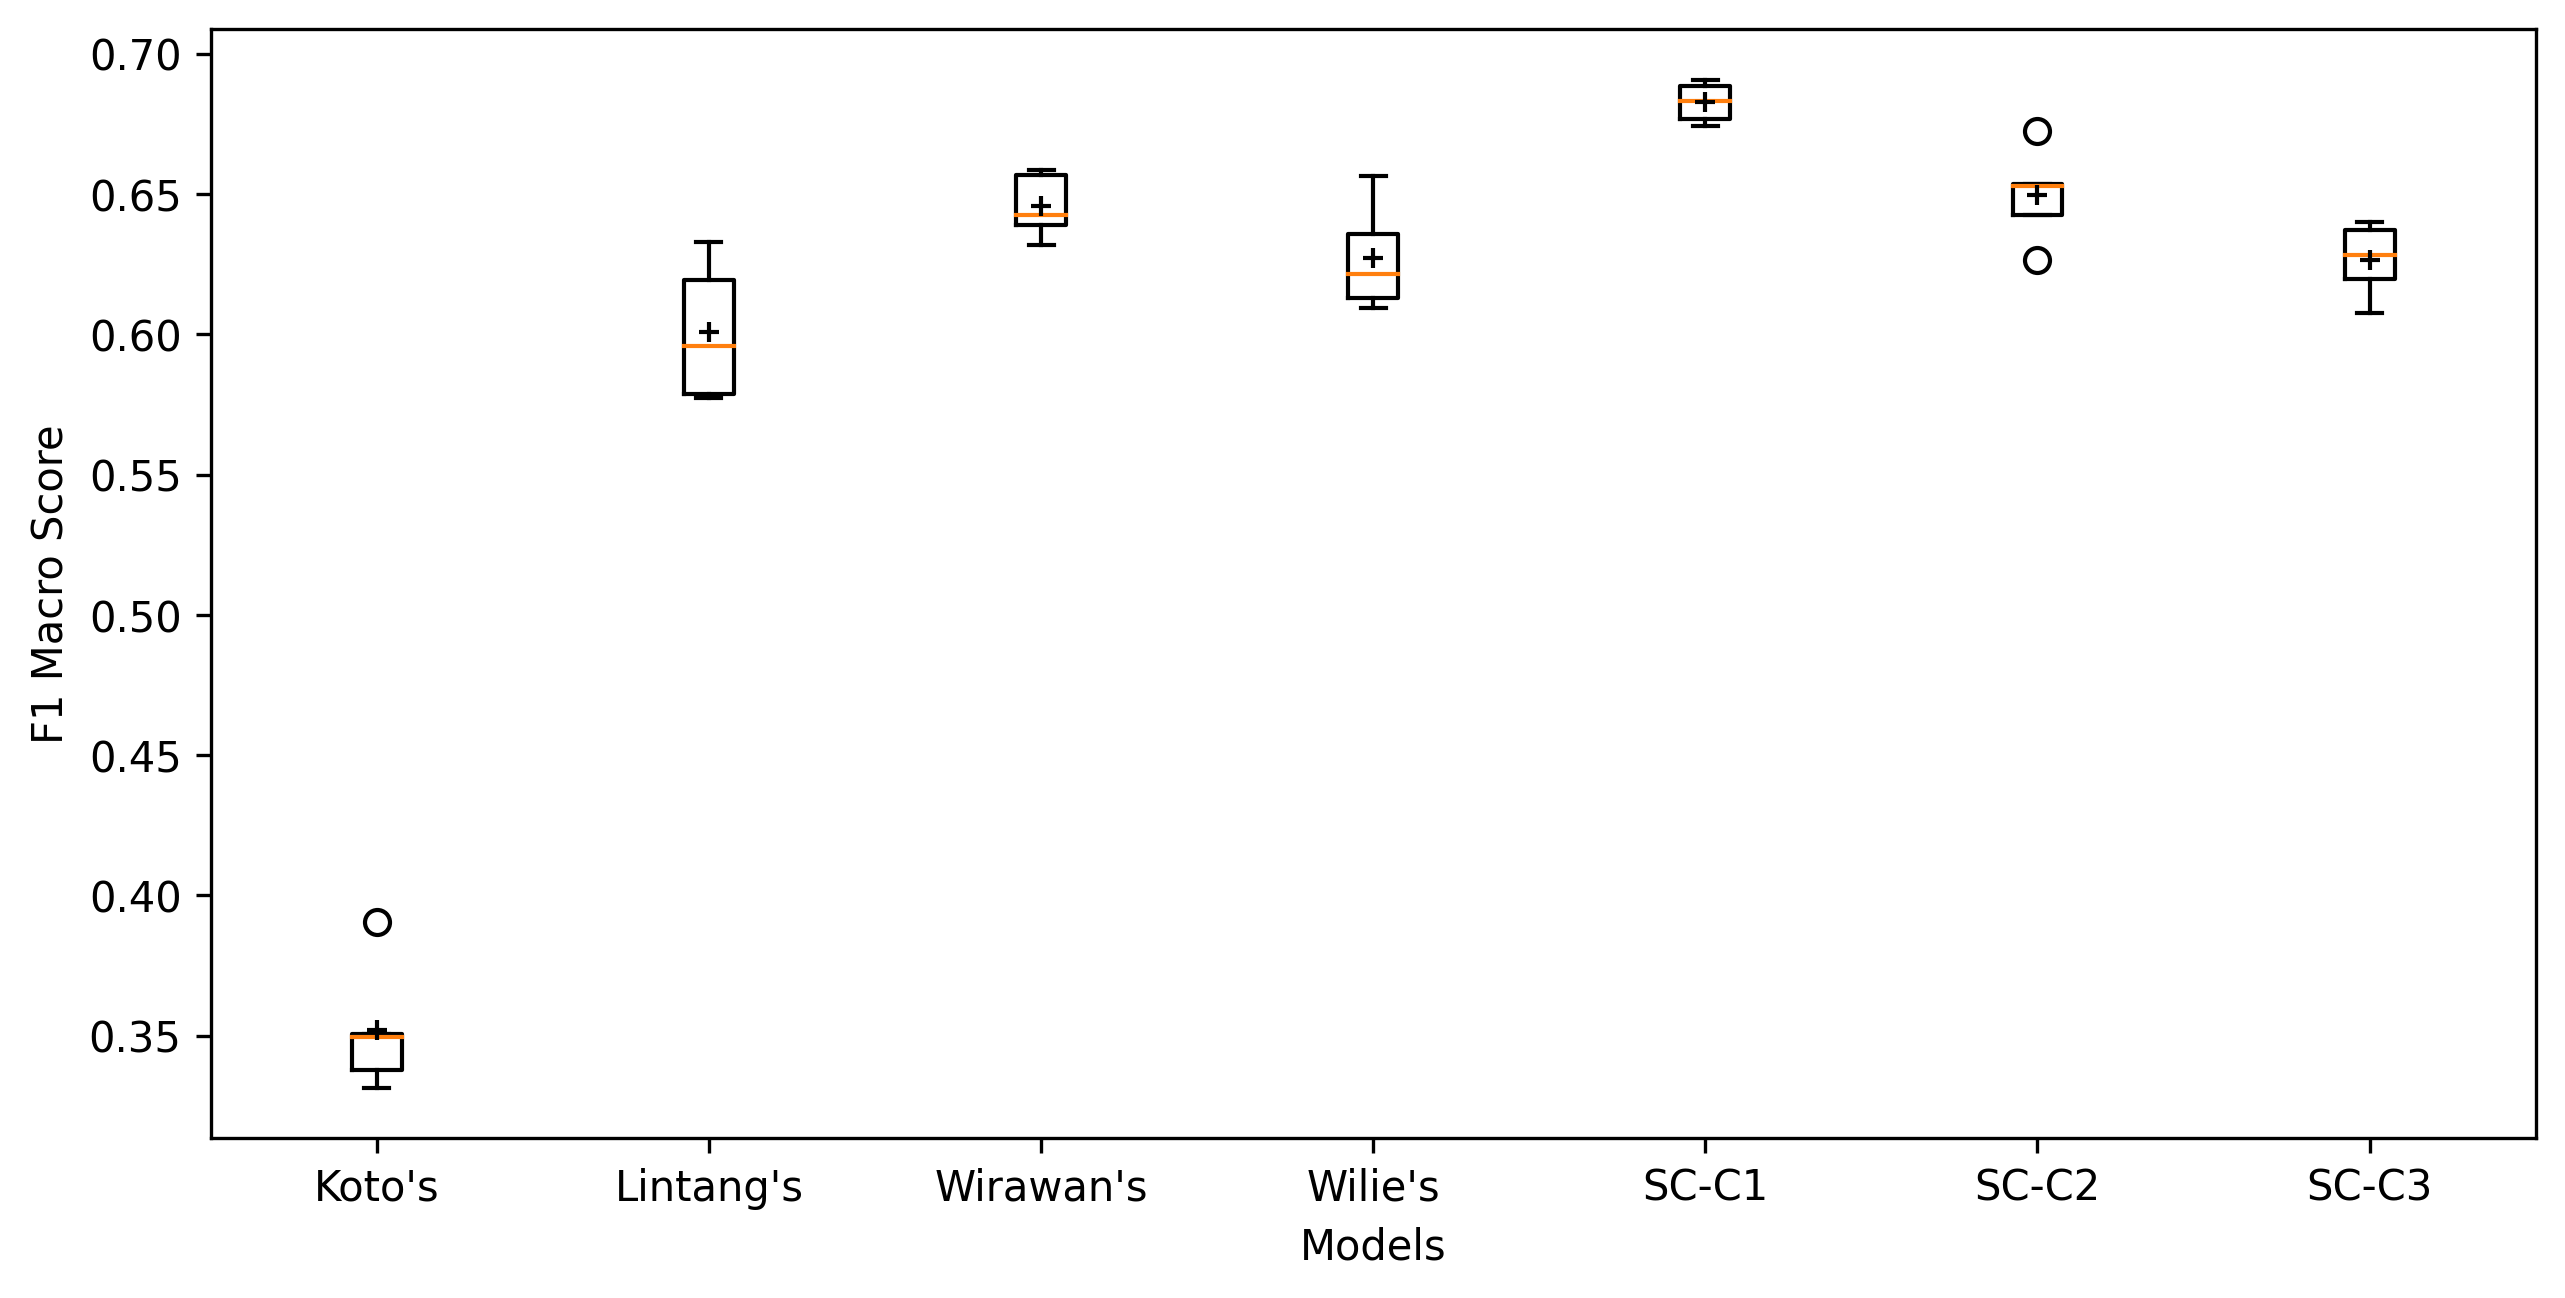

In [64]:
draw_comparison({"Koto's":grab_f1_macro(x25_1,5),
                             "Lintang's":grab_f1_macro(x25_2,5),
                             "Wirawan's":grab_f1_macro(x25_3,5),
                             "Wilie's":grab_f1_macro(x25_4,5),
                             "SC-C1":grab_f1_macro(x25_5,5),
                             "SC-C2":grab_f1_macro(x25_6,5),
                             "SC-C3":grab_f1_macro(x25_7,5),
                             },'F1 Macro Score')

# Fine tuned 25

In [49]:
models_finetuned = [
            "../../script/IndoGovBERT-final/models/wirawan-finetuned-persuratan-25/",
            "../../script/IndoGovBERT-final/models/wirawan-finetuned-peraturan-25/",
            "../../script/IndoGovBERT-final/models/wirawan-finetuned-all-25/",
            "../../script/IndoGovBERT-final/models/peraturan-finetuned-persuratan-25",
            "../../script/IndoGovBERT-final/models/persuratan-finetuned-peraturan-25/",
            ]
z25_1,z25_2,z25_3,z25_4,z25_5 = train_sdgs_kfold_real3(dataset, models_finetuned)

DatasetDict({
    train: Dataset({
        features: ['003.01', '003.02', '003.03', '003.04', '003.05', '003.06', '003.07', '003.08', '003.09', '003.10', '003.11', '003.12', '003.13', '003.14', '003.15', '003.16', '003.17', 'combined'],
        num_rows: 3900
    })
    valid: Dataset({
        features: ['003.01', '003.02', '003.03', '003.04', '003.05', '003.06', '003.07', '003.08', '003.09', '003.10', '003.11', '003.12', '003.13', '003.14', '003.15', '003.16', '003.17', 'combined'],
        num_rows: 975
    })
})
model 1- 1


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/wirawan-finetuned-persuratan-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized fro

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.17425662279129028, 'eval_f1_micro': 0.5370265686828717, 'eval_f1_macro': 0.3308109369462294, 'eval_roc_auc': 0.6878520668517469, 'eval_accuracy': 0.3528205128205128, 'eval_runtime': 0.8579, 'eval_samples_per_second': 1136.503, 'eval_steps_per_second': 18.65, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13855165243148804, 'eval_f1_micro': 0.7124214596423395, 'eval_f1_macro': 0.6222887953533569, 'eval_roc_auc': 0.7909111400729205, 'eval_accuracy': 0.5241025641025641, 'eval_runtime': 0.8609, 'eval_samples_per_second': 1132.505, 'eval_steps_per_second': 18.585, 'epoch': 2.0}
{'train_runtime': 43.1118, 'train_samples_per_second': 180.925, 'train_steps_per_second': 2.83, 'train_loss': 0.20783067922123144, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13855165243148804, 'eval_f1_micro': 0.7124214596423395, 'eval_f1_macro': 0.6222887953533569, 'eval_roc_auc': 0.7909111400729205, 'eval_accuracy': 0.5241025641025641, 'eval_runtime': 0.9314, 'eval_samples_per_second': 1046.803, 'eval_steps_per_second': 17.178, 'epoch': 2.0}
model 2- 1


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/wirawan-finetuned-peraturan-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.16622108221054077, 'eval_f1_micro': 0.5529542920847269, 'eval_f1_macro': 0.3595200314269503, 'eval_roc_auc': 0.6960813826383537, 'eval_accuracy': 0.37435897435897436, 'eval_runtime': 0.8701, 'eval_samples_per_second': 1120.545, 'eval_steps_per_second': 18.388, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13185200095176697, 'eval_f1_micro': 0.7330488383119962, 'eval_f1_macro': 0.6464333996309082, 'eval_roc_auc': 0.8051117934391454, 'eval_accuracy': 0.5487179487179488, 'eval_runtime': 0.856, 'eval_samples_per_second': 1138.958, 'eval_steps_per_second': 18.691, 'epoch': 2.0}
{'train_runtime': 39.1697, 'train_samples_per_second': 199.134, 'train_steps_per_second': 3.115, 'train_loss': 0.20072760347460136, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13185200095176697, 'eval_f1_micro': 0.7330488383119962, 'eval_f1_macro': 0.6464333996309082, 'eval_roc_auc': 0.8051117934391454, 'eval_accuracy': 0.5487179487179488, 'eval_runtime': 0.8599, 'eval_samples_per_second': 1133.906, 'eval_steps_per_second': 18.608, 'epoch': 2.0}
model 3- 1


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/wirawan-finetuned-all-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the m

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.164150208234787, 'eval_f1_micro': 0.6005361930294906, 'eval_f1_macro': 0.3979465290542837, 'eval_roc_auc': 0.7213306152012218, 'eval_accuracy': 0.41846153846153844, 'eval_runtime': 0.8539, 'eval_samples_per_second': 1141.813, 'eval_steps_per_second': 18.737, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13086645305156708, 'eval_f1_micro': 0.7357954545454546, 'eval_f1_macro': 0.6497388601628815, 'eval_roc_auc': 0.8067367893332579, 'eval_accuracy': 0.5517948717948717, 'eval_runtime': 0.8731, 'eval_samples_per_second': 1116.655, 'eval_steps_per_second': 18.325, 'epoch': 2.0}
{'train_runtime': 40.9597, 'train_samples_per_second': 190.431, 'train_steps_per_second': 2.979, 'train_loss': 0.19931661887247054, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13086645305156708, 'eval_f1_micro': 0.7357954545454546, 'eval_f1_macro': 0.6497388601628815, 'eval_roc_auc': 0.8067367893332579, 'eval_accuracy': 0.5517948717948717, 'eval_runtime': 0.8543, 'eval_samples_per_second': 1141.346, 'eval_steps_per_second': 18.73, 'epoch': 2.0}
model 4- 1


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/peraturan-finetuned-persuratan-25 were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized fr

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.16597701609134674, 'eval_f1_micro': 0.5575221238938053, 'eval_f1_macro': 0.39986767113109367, 'eval_roc_auc': 0.6990702607768631, 'eval_accuracy': 0.3723076923076923, 'eval_runtime': 0.8556, 'eval_samples_per_second': 1139.522, 'eval_steps_per_second': 18.7, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.1316787302494049, 'eval_f1_micro': 0.7306238185255198, 'eval_f1_macro': 0.655226161793549, 'eval_roc_auc': 0.8048833189956439, 'eval_accuracy': 0.5517948717948717, 'eval_runtime': 0.8468, 'eval_samples_per_second': 1151.328, 'eval_steps_per_second': 18.894, 'epoch': 2.0}
{'train_runtime': 41.4492, 'train_samples_per_second': 188.182, 'train_steps_per_second': 2.943, 'train_loss': 0.20132945013827966, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.1316787302494049, 'eval_f1_micro': 0.7306238185255198, 'eval_f1_macro': 0.655226161793549, 'eval_roc_auc': 0.8048833189956439, 'eval_accuracy': 0.5517948717948717, 'eval_runtime': 0.8694, 'eval_samples_per_second': 1121.462, 'eval_steps_per_second': 18.403, 'epoch': 2.0}
model 5- 1


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/persuratan-finetuned-peraturan-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized f

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.16816852986812592, 'eval_f1_micro': 0.5698509110988405, 'eval_f1_macro': 0.3933241341212288, 'eval_roc_auc': 0.7041410836964878, 'eval_accuracy': 0.38461538461538464, 'eval_runtime': 0.8456, 'eval_samples_per_second': 1153.048, 'eval_steps_per_second': 18.922, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.1308613270521164, 'eval_f1_micro': 0.7325023969319271, 'eval_f1_macro': 0.6655732363792293, 'eval_roc_auc': 0.8019859397783776, 'eval_accuracy': 0.5497435897435897, 'eval_runtime': 0.8516, 'eval_samples_per_second': 1144.941, 'eval_steps_per_second': 18.789, 'epoch': 2.0}
{'train_runtime': 42.8635, 'train_samples_per_second': 181.973, 'train_steps_per_second': 2.846, 'train_loss': 0.20115128501516874, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.1308613270521164, 'eval_f1_micro': 0.7325023969319271, 'eval_f1_macro': 0.6655732363792293, 'eval_roc_auc': 0.8019859397783776, 'eval_accuracy': 0.5497435897435897, 'eval_runtime': 0.858, 'eval_samples_per_second': 1136.339, 'eval_steps_per_second': 18.648, 'epoch': 2.0}
DatasetDict({
    train: Dataset({
        features: ['003.01', '003.02', '003.03', '003.04', '003.05', '003.06', '003.07', '003.08', '003.09', '003.10', '003.11', '003.12', '003.13', '003.14', '003.15', '003.16', '003.17', 'combined'],
        num_rows: 3900
    })
    valid: Dataset({
        features: ['003.01', '003.02', '003.03', '003.04', '003.05', '003.06', '003.07', '003.08', '003.09', '003.10', '003.11', '003.12', '003.13', '003.14', '003.15', '003.16', '003.17', 'combined'],
        num_rows: 975
    })
})
model 1- 2


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/wirawan-finetuned-persuratan-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized fro

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.17608247697353363, 'eval_f1_micro': 0.5544554455445545, 'eval_f1_macro': 0.3523740798443917, 'eval_roc_auc': 0.7001591493174263, 'eval_accuracy': 0.358974358974359, 'eval_runtime': 0.8777, 'eval_samples_per_second': 1110.855, 'eval_steps_per_second': 18.229, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13943514227867126, 'eval_f1_micro': 0.6945646945646946, 'eval_f1_macro': 0.6154223263264725, 'eval_roc_auc': 0.7863068713208999, 'eval_accuracy': 0.49641025641025643, 'eval_runtime': 0.8487, 'eval_samples_per_second': 1148.795, 'eval_steps_per_second': 18.852, 'epoch': 2.0}
{'train_runtime': 39.9897, 'train_samples_per_second': 195.05, 'train_steps_per_second': 3.051, 'train_loss': 0.20861885195872823, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13943514227867126, 'eval_f1_micro': 0.6945646945646946, 'eval_f1_macro': 0.6154223263264725, 'eval_roc_auc': 0.7863068713208999, 'eval_accuracy': 0.49641025641025643, 'eval_runtime': 0.8507, 'eval_samples_per_second': 1146.083, 'eval_steps_per_second': 18.808, 'epoch': 2.0}
model 2- 2


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/wirawan-finetuned-peraturan-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.16544002294540405, 'eval_f1_micro': 0.5757740358500815, 'eval_f1_macro': 0.3836364188073313, 'eval_roc_auc': 0.7106987637438207, 'eval_accuracy': 0.3712820512820513, 'eval_runtime': 0.8593, 'eval_samples_per_second': 1134.603, 'eval_steps_per_second': 18.619, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13228024542331696, 'eval_f1_micro': 0.7174929840972871, 'eval_f1_macro': 0.6412262749872499, 'eval_roc_auc': 0.8039225394729602, 'eval_accuracy': 0.5271794871794871, 'eval_runtime': 0.8519, 'eval_samples_per_second': 1144.544, 'eval_steps_per_second': 18.782, 'epoch': 2.0}
{'train_runtime': 41.9562, 'train_samples_per_second': 185.908, 'train_steps_per_second': 2.908, 'train_loss': 0.19909574164718877, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13228024542331696, 'eval_f1_micro': 0.7174929840972871, 'eval_f1_macro': 0.6412262749872499, 'eval_roc_auc': 0.8039225394729602, 'eval_accuracy': 0.5271794871794871, 'eval_runtime': 0.8516, 'eval_samples_per_second': 1144.926, 'eval_steps_per_second': 18.789, 'epoch': 2.0}
model 3- 2


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/wirawan-finetuned-all-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the m

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.1632428765296936, 'eval_f1_micro': 0.6043317485472794, 'eval_f1_macro': 0.4161618619084416, 'eval_roc_auc': 0.7272400757629344, 'eval_accuracy': 0.4041025641025641, 'eval_runtime': 0.8463, 'eval_samples_per_second': 1152.128, 'eval_steps_per_second': 18.907, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13108527660369873, 'eval_f1_micro': 0.7322352941176471, 'eval_f1_macro': 0.6489633856283004, 'eval_roc_auc': 0.8091229890206619, 'eval_accuracy': 0.5476923076923077, 'eval_runtime': 0.8618, 'eval_samples_per_second': 1131.37, 'eval_steps_per_second': 18.566, 'epoch': 2.0}
{'train_runtime': 41.4469, 'train_samples_per_second': 188.193, 'train_steps_per_second': 2.944, 'train_loss': 0.1973515182244973, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13108527660369873, 'eval_f1_micro': 0.7322352941176471, 'eval_f1_macro': 0.6489633856283004, 'eval_roc_auc': 0.8091229890206619, 'eval_accuracy': 0.5476923076923077, 'eval_runtime': 0.8387, 'eval_samples_per_second': 1162.447, 'eval_steps_per_second': 19.076, 'epoch': 2.0}
model 4- 2


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/peraturan-finetuned-persuratan-25 were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized fr

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.16547638177871704, 'eval_f1_micro': 0.6064109301103521, 'eval_f1_macro': 0.4748573797398161, 'eval_roc_auc': 0.729085028961246, 'eval_accuracy': 0.40923076923076923, 'eval_runtime': 0.8565, 'eval_samples_per_second': 1138.328, 'eval_steps_per_second': 18.68, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.1324804276227951, 'eval_f1_micro': 0.7073170731707317, 'eval_f1_macro': 0.6300984119582212, 'eval_roc_auc': 0.7885553957513027, 'eval_accuracy': 0.5076923076923077, 'eval_runtime': 0.8473, 'eval_samples_per_second': 1150.679, 'eval_steps_per_second': 18.883, 'epoch': 2.0}
{'train_runtime': 44.0296, 'train_samples_per_second': 177.153, 'train_steps_per_second': 2.771, 'train_loss': 0.19986193297339266, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.1324804276227951, 'eval_f1_micro': 0.7073170731707317, 'eval_f1_macro': 0.6300984119582212, 'eval_roc_auc': 0.7885553957513027, 'eval_accuracy': 0.5076923076923077, 'eval_runtime': 0.8454, 'eval_samples_per_second': 1153.243, 'eval_steps_per_second': 18.925, 'epoch': 2.0}
model 5- 2


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/persuratan-finetuned-peraturan-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized f

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.1672467440366745, 'eval_f1_micro': 0.5577557755775577, 'eval_f1_macro': 0.38394627657104263, 'eval_roc_auc': 0.701461815952656, 'eval_accuracy': 0.3682051282051282, 'eval_runtime': 0.8597, 'eval_samples_per_second': 1134.105, 'eval_steps_per_second': 18.611, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13189251720905304, 'eval_f1_micro': 0.7098674521354933, 'eval_f1_macro': 0.6323911447382592, 'eval_roc_auc': 0.7881109565463419, 'eval_accuracy': 0.5097435897435898, 'eval_runtime': 0.85, 'eval_samples_per_second': 1147.077, 'eval_steps_per_second': 18.824, 'epoch': 2.0}
{'train_runtime': 40.4066, 'train_samples_per_second': 193.038, 'train_steps_per_second': 3.019, 'train_loss': 0.19966772736095992, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13189251720905304, 'eval_f1_micro': 0.7098674521354933, 'eval_f1_macro': 0.6323911447382592, 'eval_roc_auc': 0.7881109565463419, 'eval_accuracy': 0.5097435897435898, 'eval_runtime': 0.8488, 'eval_samples_per_second': 1148.616, 'eval_steps_per_second': 18.849, 'epoch': 2.0}
DatasetDict({
    train: Dataset({
        features: ['003.01', '003.02', '003.03', '003.04', '003.05', '003.06', '003.07', '003.08', '003.09', '003.10', '003.11', '003.12', '003.13', '003.14', '003.15', '003.16', '003.17', 'combined'],
        num_rows: 3900
    })
    valid: Dataset({
        features: ['003.01', '003.02', '003.03', '003.04', '003.05', '003.06', '003.07', '003.08', '003.09', '003.10', '003.11', '003.12', '003.13', '003.14', '003.15', '003.16', '003.17', 'combined'],
        num_rows: 975
    })
})
model 1- 3


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/wirawan-finetuned-persuratan-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized fro

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.17965850234031677, 'eval_f1_micro': 0.5235042735042735, 'eval_f1_macro': 0.37518976301768686, 'eval_roc_auc': 0.6879548821245661, 'eval_accuracy': 0.3466666666666667, 'eval_runtime': 0.8757, 'eval_samples_per_second': 1113.334, 'eval_steps_per_second': 18.27, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.14383985102176666, 'eval_f1_micro': 0.6714836223506745, 'eval_f1_macro': 0.5795897515571479, 'eval_roc_auc': 0.7688492127294871, 'eval_accuracy': 0.4646153846153846, 'eval_runtime': 0.8718, 'eval_samples_per_second': 1118.36, 'eval_steps_per_second': 18.353, 'epoch': 2.0}
{'train_runtime': 40.9832, 'train_samples_per_second': 190.322, 'train_steps_per_second': 2.977, 'train_loss': 0.20713404358410445, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.14383985102176666, 'eval_f1_micro': 0.6714836223506745, 'eval_f1_macro': 0.5795897515571479, 'eval_roc_auc': 0.7688492127294871, 'eval_accuracy': 0.4646153846153846, 'eval_runtime': 0.8713, 'eval_samples_per_second': 1119.062, 'eval_steps_per_second': 18.364, 'epoch': 2.0}
model 2- 3


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/wirawan-finetuned-peraturan-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.16923728585243225, 'eval_f1_micro': 0.5702521873391663, 'eval_f1_macro': 0.4043284847924666, 'eval_roc_auc': 0.712706518207229, 'eval_accuracy': 0.40102564102564103, 'eval_runtime': 0.8562, 'eval_samples_per_second': 1138.737, 'eval_steps_per_second': 18.687, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13561101257801056, 'eval_f1_micro': 0.7047797563261481, 'eval_f1_macro': 0.6168254721440585, 'eval_roc_auc': 0.7902187384867831, 'eval_accuracy': 0.5097435897435898, 'eval_runtime': 0.8651, 'eval_samples_per_second': 1127.1, 'eval_steps_per_second': 18.496, 'epoch': 2.0}
{'train_runtime': 41.0148, 'train_samples_per_second': 190.175, 'train_steps_per_second': 2.975, 'train_loss': 0.1983672595414959, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13561101257801056, 'eval_f1_micro': 0.7047797563261481, 'eval_f1_macro': 0.6168254721440585, 'eval_roc_auc': 0.7902187384867831, 'eval_accuracy': 0.5097435897435898, 'eval_runtime': 0.8537, 'eval_samples_per_second': 1142.079, 'eval_steps_per_second': 18.742, 'epoch': 2.0}
model 3- 3


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/wirawan-finetuned-all-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the m

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.16866017878055573, 'eval_f1_micro': 0.5972986493246624, 'eval_f1_macro': 0.4626871708406279, 'eval_roc_auc': 0.729065277623375, 'eval_accuracy': 0.4297435897435897, 'eval_runtime': 0.8554, 'eval_samples_per_second': 1139.829, 'eval_steps_per_second': 18.705, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13426488637924194, 'eval_f1_micro': 0.7110070257611241, 'eval_f1_macro': 0.6278110590906735, 'eval_roc_auc': 0.7931471342789829, 'eval_accuracy': 0.5056410256410256, 'eval_runtime': 0.8436, 'eval_samples_per_second': 1155.699, 'eval_steps_per_second': 18.965, 'epoch': 2.0}
{'train_runtime': 40.1025, 'train_samples_per_second': 194.502, 'train_steps_per_second': 3.042, 'train_loss': 0.19751683219534452, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13426488637924194, 'eval_f1_micro': 0.7110070257611241, 'eval_f1_macro': 0.6278110590906735, 'eval_roc_auc': 0.7931471342789829, 'eval_accuracy': 0.5056410256410256, 'eval_runtime': 0.8518, 'eval_samples_per_second': 1144.628, 'eval_steps_per_second': 18.784, 'epoch': 2.0}
model 4- 3


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/peraturan-finetuned-persuratan-25 were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized fr

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.16857124865055084, 'eval_f1_micro': 0.5950329447541814, 'eval_f1_macro': 0.48851421566644826, 'eval_roc_auc': 0.7256851579456395, 'eval_accuracy': 0.42256410256410254, 'eval_runtime': 0.8614, 'eval_samples_per_second': 1131.856, 'eval_steps_per_second': 18.574, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.135540172457695, 'eval_f1_micro': 0.7054373522458628, 'eval_f1_macro': 0.6239138838652964, 'eval_roc_auc': 0.7883018213813319, 'eval_accuracy': 0.5097435897435898, 'eval_runtime': 0.8482, 'eval_samples_per_second': 1149.51, 'eval_steps_per_second': 18.864, 'epoch': 2.0}
{'train_runtime': 44.3594, 'train_samples_per_second': 175.837, 'train_steps_per_second': 2.75, 'train_loss': 0.19936370849609375, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.135540172457695, 'eval_f1_micro': 0.7054373522458628, 'eval_f1_macro': 0.6239138838652964, 'eval_roc_auc': 0.7883018213813319, 'eval_accuracy': 0.5097435897435898, 'eval_runtime': 0.8478, 'eval_samples_per_second': 1150.079, 'eval_steps_per_second': 18.873, 'epoch': 2.0}
model 5- 3


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/persuratan-finetuned-peraturan-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized f

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.17349550127983093, 'eval_f1_micro': 0.5536663124335813, 'eval_f1_macro': 0.4265074802099591, 'eval_roc_auc': 0.7007413478031979, 'eval_accuracy': 0.36615384615384616, 'eval_runtime': 0.8478, 'eval_samples_per_second': 1150.054, 'eval_steps_per_second': 18.873, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13661503791809082, 'eval_f1_micro': 0.6888567293777134, 'eval_f1_macro': 0.6159343522345296, 'eval_roc_auc': 0.7761385049746283, 'eval_accuracy': 0.49538461538461537, 'eval_runtime': 0.8636, 'eval_samples_per_second': 1129.0, 'eval_steps_per_second': 18.527, 'epoch': 2.0}
{'train_runtime': 42.018, 'train_samples_per_second': 185.635, 'train_steps_per_second': 2.904, 'train_loss': 0.20119185525862898, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13661503791809082, 'eval_f1_micro': 0.6888567293777134, 'eval_f1_macro': 0.6159343522345296, 'eval_roc_auc': 0.7761385049746283, 'eval_accuracy': 0.49538461538461537, 'eval_runtime': 0.8639, 'eval_samples_per_second': 1128.634, 'eval_steps_per_second': 18.521, 'epoch': 2.0}
DatasetDict({
    train: Dataset({
        features: ['003.01', '003.02', '003.03', '003.04', '003.05', '003.06', '003.07', '003.08', '003.09', '003.10', '003.11', '003.12', '003.13', '003.14', '003.15', '003.16', '003.17', 'combined'],
        num_rows: 3900
    })
    valid: Dataset({
        features: ['003.01', '003.02', '003.03', '003.04', '003.05', '003.06', '003.07', '003.08', '003.09', '003.10', '003.11', '003.12', '003.13', '003.14', '003.15', '003.16', '003.17', 'combined'],
        num_rows: 975
    })
})
model 1- 4


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/wirawan-finetuned-persuratan-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized fro

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.17491738498210907, 'eval_f1_micro': 0.5344352617079889, 'eval_f1_macro': 0.3382754259104511, 'eval_roc_auc': 0.6906579471477698, 'eval_accuracy': 0.3682051282051282, 'eval_runtime': 0.8628, 'eval_samples_per_second': 1130.03, 'eval_steps_per_second': 18.544, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13940899074077606, 'eval_f1_micro': 0.7124183006535947, 'eval_f1_macro': 0.6224204803599306, 'eval_roc_auc': 0.7997274158521764, 'eval_accuracy': 0.5394871794871795, 'eval_runtime': 0.8463, 'eval_samples_per_second': 1152.117, 'eval_steps_per_second': 18.907, 'epoch': 2.0}
{'train_runtime': 40.7496, 'train_samples_per_second': 191.413, 'train_steps_per_second': 2.994, 'train_loss': 0.20409799794681738, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13940899074077606, 'eval_f1_micro': 0.7124183006535947, 'eval_f1_macro': 0.6224204803599306, 'eval_roc_auc': 0.7997274158521764, 'eval_accuracy': 0.5394871794871795, 'eval_runtime': 0.8561, 'eval_samples_per_second': 1138.898, 'eval_steps_per_second': 18.69, 'epoch': 2.0}
model 2- 4


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/wirawan-finetuned-peraturan-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.1697520762681961, 'eval_f1_micro': 0.5554359526372443, 'eval_f1_macro': 0.35642281719573776, 'eval_roc_auc': 0.7026070410044061, 'eval_accuracy': 0.39897435897435896, 'eval_runtime': 0.8571, 'eval_samples_per_second': 1137.575, 'eval_steps_per_second': 18.668, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13518421351909637, 'eval_f1_micro': 0.711737089201878, 'eval_f1_macro': 0.6279996896504599, 'eval_roc_auc': 0.7979654444358054, 'eval_accuracy': 0.5446153846153846, 'eval_runtime': 0.863, 'eval_samples_per_second': 1129.819, 'eval_steps_per_second': 18.541, 'epoch': 2.0}
{'train_runtime': 36.8802, 'train_samples_per_second': 211.495, 'train_steps_per_second': 3.308, 'train_loss': 0.2002228127151239, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13518421351909637, 'eval_f1_micro': 0.711737089201878, 'eval_f1_macro': 0.6279996896504599, 'eval_roc_auc': 0.7979654444358054, 'eval_accuracy': 0.5446153846153846, 'eval_runtime': 0.8628, 'eval_samples_per_second': 1130.026, 'eval_steps_per_second': 18.544, 'epoch': 2.0}
model 3- 4


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/wirawan-finetuned-all-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the m

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.16705499589443207, 'eval_f1_micro': 0.5674666666666667, 'eval_f1_macro': 0.3990962365379718, 'eval_roc_auc': 0.7089438285497839, 'eval_accuracy': 0.4112820512820513, 'eval_runtime': 0.8507, 'eval_samples_per_second': 1146.096, 'eval_steps_per_second': 18.808, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13362181186676025, 'eval_f1_micro': 0.7367450437989856, 'eval_f1_macro': 0.6663944405056883, 'eval_roc_auc': 0.8143523788991898, 'eval_accuracy': 0.5682051282051283, 'eval_runtime': 0.8617, 'eval_samples_per_second': 1131.445, 'eval_steps_per_second': 18.567, 'epoch': 2.0}
{'train_runtime': 39.5037, 'train_samples_per_second': 197.45, 'train_steps_per_second': 3.088, 'train_loss': 0.19843212502901672, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13362181186676025, 'eval_f1_micro': 0.7367450437989856, 'eval_f1_macro': 0.6663944405056883, 'eval_roc_auc': 0.8143523788991898, 'eval_accuracy': 0.5682051282051283, 'eval_runtime': 0.8409, 'eval_samples_per_second': 1159.454, 'eval_steps_per_second': 19.027, 'epoch': 2.0}
model 4- 4


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/peraturan-finetuned-persuratan-25 were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized fr

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.16809776425361633, 'eval_f1_micro': 0.5366666666666666, 'eval_f1_macro': 0.3851120129973074, 'eval_roc_auc': 0.6902860784846094, 'eval_accuracy': 0.37538461538461537, 'eval_runtime': 0.8698, 'eval_samples_per_second': 1120.924, 'eval_steps_per_second': 18.395, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13306377828121185, 'eval_f1_micro': 0.7216203485633539, 'eval_f1_macro': 0.6483522296339653, 'eval_roc_auc': 0.8016397459048191, 'eval_accuracy': 0.5528205128205128, 'eval_runtime': 0.8847, 'eval_samples_per_second': 1102.065, 'eval_steps_per_second': 18.085, 'epoch': 2.0}
{'train_runtime': 42.2719, 'train_samples_per_second': 184.52, 'train_steps_per_second': 2.886, 'train_loss': 0.1994357343579902, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13306377828121185, 'eval_f1_micro': 0.7216203485633539, 'eval_f1_macro': 0.6483522296339653, 'eval_roc_auc': 0.8016397459048191, 'eval_accuracy': 0.5528205128205128, 'eval_runtime': 0.8518, 'eval_samples_per_second': 1144.64, 'eval_steps_per_second': 18.784, 'epoch': 2.0}
model 5- 4


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/persuratan-finetuned-peraturan-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized f

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.17457416653633118, 'eval_f1_micro': 0.5413450937155457, 'eval_f1_macro': 0.35941189194185963, 'eval_roc_auc': 0.6932749566231187, 'eval_accuracy': 0.37846153846153846, 'eval_runtime': 0.8807, 'eval_samples_per_second': 1107.058, 'eval_steps_per_second': 18.167, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13526123762130737, 'eval_f1_micro': 0.7041306436119117, 'eval_f1_macro': 0.639476129921686, 'eval_roc_auc': 0.7887639168793759, 'eval_accuracy': 0.5374358974358975, 'eval_runtime': 0.8547, 'eval_samples_per_second': 1140.725, 'eval_steps_per_second': 18.72, 'epoch': 2.0}
{'train_runtime': 39.4249, 'train_samples_per_second': 197.845, 'train_steps_per_second': 3.094, 'train_loss': 0.20213951048303824, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13526123762130737, 'eval_f1_micro': 0.7041306436119117, 'eval_f1_macro': 0.639476129921686, 'eval_roc_auc': 0.7887639168793759, 'eval_accuracy': 0.5374358974358975, 'eval_runtime': 0.862, 'eval_samples_per_second': 1131.102, 'eval_steps_per_second': 18.562, 'epoch': 2.0}
DatasetDict({
    train: Dataset({
        features: ['003.01', '003.02', '003.03', '003.04', '003.05', '003.06', '003.07', '003.08', '003.09', '003.10', '003.11', '003.12', '003.13', '003.14', '003.15', '003.16', '003.17', 'combined'],
        num_rows: 3900
    })
    valid: Dataset({
        features: ['003.01', '003.02', '003.03', '003.04', '003.05', '003.06', '003.07', '003.08', '003.09', '003.10', '003.11', '003.12', '003.13', '003.14', '003.15', '003.16', '003.17', 'combined'],
        num_rows: 975
    })
})
model 1- 5


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/wirawan-finetuned-persuratan-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized fro

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.17467504739761353, 'eval_f1_micro': 0.5338600451467268, 'eval_f1_macro': 0.35452187823200493, 'eval_roc_auc': 0.6894119261648254, 'eval_accuracy': 0.3517948717948718, 'eval_runtime': 0.8724, 'eval_samples_per_second': 1117.653, 'eval_steps_per_second': 18.341, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.1411386877298355, 'eval_f1_micro': 0.6936806560540278, 'eval_f1_macro': 0.6054490795229224, 'eval_roc_auc': 0.7872143690386331, 'eval_accuracy': 0.5097435897435898, 'eval_runtime': 0.8651, 'eval_samples_per_second': 1127.043, 'eval_steps_per_second': 18.495, 'epoch': 2.0}
{'train_runtime': 37.4002, 'train_samples_per_second': 208.555, 'train_steps_per_second': 3.262, 'train_loss': 0.2071575258598953, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.1411386877298355, 'eval_f1_micro': 0.6936806560540278, 'eval_f1_macro': 0.6054490795229224, 'eval_roc_auc': 0.7872143690386331, 'eval_accuracy': 0.5097435897435898, 'eval_runtime': 0.9081, 'eval_samples_per_second': 1073.653, 'eval_steps_per_second': 17.619, 'epoch': 2.0}
model 2- 5


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/wirawan-finetuned-peraturan-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.16414670646190643, 'eval_f1_micro': 0.576860401955459, 'eval_f1_macro': 0.4108333986650061, 'eval_roc_auc': 0.7125351677760241, 'eval_accuracy': 0.39384615384615385, 'eval_runtime': 0.8813, 'eval_samples_per_second': 1106.289, 'eval_steps_per_second': 18.154, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.1323426067829132, 'eval_f1_micro': 0.7294117647058824, 'eval_f1_macro': 0.6510605399751287, 'eval_roc_auc': 0.8100168119124408, 'eval_accuracy': 0.561025641025641, 'eval_runtime': 0.8613, 'eval_samples_per_second': 1131.985, 'eval_steps_per_second': 18.576, 'epoch': 2.0}
{'train_runtime': 40.6882, 'train_samples_per_second': 191.702, 'train_steps_per_second': 2.998, 'train_loss': 0.1987094722810339, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.1323426067829132, 'eval_f1_micro': 0.7294117647058824, 'eval_f1_macro': 0.6510605399751287, 'eval_roc_auc': 0.8100168119124408, 'eval_accuracy': 0.561025641025641, 'eval_runtime': 0.8469, 'eval_samples_per_second': 1151.208, 'eval_steps_per_second': 18.892, 'epoch': 2.0}
model 3- 5


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/wirawan-finetuned-all-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the m

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.16391119360923767, 'eval_f1_micro': 0.5564245810055867, 'eval_f1_macro': 0.38434025303285313, 'eval_roc_auc': 0.6997615453235435, 'eval_accuracy': 0.37435897435897436, 'eval_runtime': 0.8655, 'eval_samples_per_second': 1126.56, 'eval_steps_per_second': 18.487, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.1324533075094223, 'eval_f1_micro': 0.7197362223268958, 'eval_f1_macro': 0.6368501664256707, 'eval_roc_auc': 0.8052700198998148, 'eval_accuracy': 0.5394871794871795, 'eval_runtime': 0.8544, 'eval_samples_per_second': 1141.211, 'eval_steps_per_second': 18.728, 'epoch': 2.0}
{'train_runtime': 41.115, 'train_samples_per_second': 189.712, 'train_steps_per_second': 2.967, 'train_loss': 0.1979162497598617, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.1324533075094223, 'eval_f1_micro': 0.7197362223268958, 'eval_f1_macro': 0.6368501664256707, 'eval_roc_auc': 0.8052700198998148, 'eval_accuracy': 0.5394871794871795, 'eval_runtime': 0.8888, 'eval_samples_per_second': 1097.035, 'eval_steps_per_second': 18.003, 'epoch': 2.0}
model 4- 5


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/peraturan-finetuned-persuratan-25 were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized fr

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.16626955568790436, 'eval_f1_micro': 0.3962025316455696, 'eval_f1_macro': 0.23369992356303887, 'eval_roc_auc': 0.6256776230014411, 'eval_accuracy': 0.24820512820512822, 'eval_runtime': 0.8694, 'eval_samples_per_second': 1121.448, 'eval_steps_per_second': 18.403, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13287892937660217, 'eval_f1_micro': 0.7173076923076922, 'eval_f1_macro': 0.6473613476559882, 'eval_roc_auc': 0.7987974336101009, 'eval_accuracy': 0.5394871794871795, 'eval_runtime': 0.8699, 'eval_samples_per_second': 1120.859, 'eval_steps_per_second': 18.394, 'epoch': 2.0}
{'train_runtime': 44.6292, 'train_samples_per_second': 174.773, 'train_steps_per_second': 2.734, 'train_loss': 0.19952822513267643, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13287892937660217, 'eval_f1_micro': 0.7173076923076922, 'eval_f1_macro': 0.6473613476559882, 'eval_roc_auc': 0.7987974336101009, 'eval_accuracy': 0.5394871794871795, 'eval_runtime': 0.862, 'eval_samples_per_second': 1131.045, 'eval_steps_per_second': 18.561, 'epoch': 2.0}
model 5- 5


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/persuratan-finetuned-peraturan-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized f

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.16608485579490662, 'eval_f1_micro': 0.5075669383003492, 'eval_f1_macro': 0.34272256666392614, 'eval_roc_auc': 0.6749862759898442, 'eval_accuracy': 0.3230769230769231, 'eval_runtime': 0.8767, 'eval_samples_per_second': 1112.092, 'eval_steps_per_second': 18.25, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13215863704681396, 'eval_f1_micro': 0.7107843137254901, 'eval_f1_macro': 0.6366934617141927, 'eval_roc_auc': 0.7909147052768819, 'eval_accuracy': 0.5292307692307693, 'eval_runtime': 0.8751, 'eval_samples_per_second': 1114.21, 'eval_steps_per_second': 18.284, 'epoch': 2.0}
{'train_runtime': 41.8157, 'train_samples_per_second': 186.533, 'train_steps_per_second': 2.918, 'train_loss': 0.19951398255395109, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.13215863704681396, 'eval_f1_micro': 0.7107843137254901, 'eval_f1_macro': 0.6366934617141927, 'eval_roc_auc': 0.7909147052768819, 'eval_accuracy': 0.5292307692307693, 'eval_runtime': 0.8496, 'eval_samples_per_second': 1147.63, 'eval_steps_per_second': 18.833, 'epoch': 2.0}
[{'eval_loss': 0.13855165243148804, 'eval_f1_micro': 0.7124214596423395, 'eval_f1_macro': 0.6222887953533569, 'eval_roc_auc': 0.7909111400729205, 'eval_accuracy': 0.5241025641025641, 'eval_runtime': 0.9314, 'eval_samples_per_second': 1046.803, 'eval_steps_per_second': 17.178, 'epoch': 2.0}, {'eval_loss': 0.13943514227867126, 'eval_f1_micro': 0.6945646945646946, 'eval_f1_macro': 0.6154223263264725, 'eval_roc_auc': 0.7863068713208999, 'eval_accuracy': 0.49641025641025643, 'eval_runtime': 0.8507, 'eval_samples_per_second': 1146.083, 'eval_steps_per_second': 18.808, 'epoch': 2.0}, {'eval_loss': 0.14383985102176666, 'eval_f1_micro': 0.6714836223506745, 'eval_f1_macro': 0.5795897515571479, 'eval_roc_auc': 0.

In [53]:
print_summary([x25_1,x25_2,x25_3,x25_4,x25_5,x25_6,x25_7])

     Model  Accuracy  F1 Macro  F1 Micro
0  Model 1     0.368     0.352     0.556
1  Model 2     0.500     0.601     0.698
2  Model 3     0.543     0.646     0.729
3  Model 4     0.523     0.627     0.715
4  Model 5     0.575     0.683     0.744
5  Model 6     0.532     0.650     0.717
6  Model 7     0.519     0.627     0.705


In [54]:
print_summary([z25_1,z25_2,z25_3,z25_4,z25_5])

     Model  Accuracy  F1 Macro  F1 Micro
0  Model 1     0.507     0.609     0.697
1  Model 2     0.538     0.637     0.719
2  Model 3     0.543     0.646     0.727
3  Model 4     0.532     0.641     0.716
4  Model 5     0.524     0.638     0.709


# Classifier

In [56]:
print_summary([x25_1,x25_2,x25_3,x25_4,x25_5,x25_6,x25_7],2)

     Model  Accuracy  F1 Macro  F1 Micro
0  Model 1      0.37      0.35      0.56
1  Model 2      0.50      0.60      0.70
2  Model 3      0.54      0.65      0.73
3  Model 4      0.52      0.63      0.72
4  Model 5      0.57      0.68      0.74
5  Model 6      0.53      0.65      0.72
6  Model 7      0.52      0.63      0.71


In [57]:
print_summary([z25_1,z25_2,z25_3,z25_4,z25_5],2)

     Model  Accuracy  F1 Macro  F1 Micro
0  Model 1      0.51      0.61      0.70
1  Model 2      0.54      0.64      0.72
2  Model 3      0.54      0.65      0.73
3  Model 4      0.53      0.64      0.72
4  Model 5      0.52      0.64      0.71


# Compare 2

In [66]:
models_25 = [
            "bert-base-multilingual-uncased",
            "../../script/IndoGovBERT-final/models/persuratan-final-25/"
            ]
y25_1,y25_2 = train_sdgs_kfold_real3(dataset, models_25)

DatasetDict({
    train: Dataset({
        features: ['003.01', '003.02', '003.03', '003.04', '003.05', '003.06', '003.07', '003.08', '003.09', '003.10', '003.11', '003.12', '003.13', '003.14', '003.15', '003.16', '003.17', 'combined'],
        num_rows: 3900
    })
    valid: Dataset({
        features: ['003.01', '003.02', '003.03', '003.04', '003.05', '003.06', '003.07', '003.08', '003.09', '003.10', '003.11', '003.12', '003.13', '003.14', '003.15', '003.16', '003.17', 'combined'],
        num_rows: 975
    })
})
model 1- 1


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingu

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.23395994305610657, 'eval_f1_micro': 0.0, 'eval_f1_macro': 0.0, 'eval_roc_auc': 0.5, 'eval_accuracy': 0.0041025641025641026, 'eval_runtime': 0.8935, 'eval_samples_per_second': 1091.272, 'eval_steps_per_second': 17.908, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.19356128573417664, 'eval_f1_micro': 0.27702702702702703, 'eval_f1_macro': 0.15317679447730542, 'eval_roc_auc': 0.5809881353367015, 'eval_accuracy': 0.1117948717948718, 'eval_runtime': 0.8937, 'eval_samples_per_second': 1090.978, 'eval_steps_per_second': 17.903, 'epoch': 2.0}
{'train_runtime': 52.9601, 'train_samples_per_second': 147.281, 'train_steps_per_second': 2.304, 'train_loss': 0.2647390209260534, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.19356128573417664, 'eval_f1_micro': 0.27702702702702703, 'eval_f1_macro': 0.15317679447730542, 'eval_roc_auc': 0.5809881353367015, 'eval_accuracy': 0.1117948717948718, 'eval_runtime': 0.8534, 'eval_samples_per_second': 1142.508, 'eval_steps_per_second': 18.749, 'epoch': 2.0}
model 2- 1


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/persuratan-final-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model 

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.14623872935771942, 'eval_f1_micro': 0.7110685194058458, 'eval_f1_macro': 0.6222762234569756, 'eval_roc_auc': 0.7924772762520046, 'eval_accuracy': 0.5394871794871795, 'eval_runtime': 0.8547, 'eval_samples_per_second': 1140.711, 'eval_steps_per_second': 18.719, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.12081016600131989, 'eval_f1_micro': 0.7518587360594795, 'eval_f1_macro': 0.6907644926029817, 'eval_roc_auc': 0.8192145291867265, 'eval_accuracy': 0.5846153846153846, 'eval_runtime': 0.8703, 'eval_samples_per_second': 1120.252, 'eval_steps_per_second': 18.384, 'epoch': 2.0}
{'train_runtime': 43.1873, 'train_samples_per_second': 180.609, 'train_steps_per_second': 2.825, 'train_loss': 0.18274224390749072, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.12081016600131989, 'eval_f1_micro': 0.7518587360594795, 'eval_f1_macro': 0.6907644926029817, 'eval_roc_auc': 0.8192145291867265, 'eval_accuracy': 0.5846153846153846, 'eval_runtime': 0.8922, 'eval_samples_per_second': 1092.76, 'eval_steps_per_second': 17.932, 'epoch': 2.0}
DatasetDict({
    train: Dataset({
        features: ['003.01', '003.02', '003.03', '003.04', '003.05', '003.06', '003.07', '003.08', '003.09', '003.10', '003.11', '003.12', '003.13', '003.14', '003.15', '003.16', '003.17', 'combined'],
        num_rows: 3900
    })
    valid: Dataset({
        features: ['003.01', '003.02', '003.03', '003.04', '003.05', '003.06', '003.07', '003.08', '003.09', '003.10', '003.11', '003.12', '003.13', '003.14', '003.15', '003.16', '003.17', 'combined'],
        num_rows: 975
    })
})
model 1- 2


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingu

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.2357466220855713, 'eval_f1_micro': 0.0, 'eval_f1_macro': 0.0, 'eval_roc_auc': 0.5, 'eval_accuracy': 0.0041025641025641026, 'eval_runtime': 0.8614, 'eval_samples_per_second': 1131.839, 'eval_steps_per_second': 18.574, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.19520047307014465, 'eval_f1_micro': 0.2005730659025788, 'eval_f1_macro': 0.09020677762358353, 'eval_roc_auc': 0.5558661259519487, 'eval_accuracy': 0.09948717948717949, 'eval_runtime': 0.8453, 'eval_samples_per_second': 1153.442, 'eval_steps_per_second': 18.928, 'epoch': 2.0}
{'train_runtime': 50.309, 'train_samples_per_second': 155.042, 'train_steps_per_second': 2.425, 'train_loss': 0.26737213134765625, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.19520047307014465, 'eval_f1_micro': 0.2005730659025788, 'eval_f1_macro': 0.09020677762358353, 'eval_roc_auc': 0.5558661259519487, 'eval_accuracy': 0.09948717948717949, 'eval_runtime': 0.8725, 'eval_samples_per_second': 1117.449, 'eval_steps_per_second': 18.338, 'epoch': 2.0}
model 2- 2


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/persuratan-final-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model 

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.14793574810028076, 'eval_f1_micro': 0.6549118387909321, 'eval_f1_macro': 0.5513142741582734, 'eval_roc_auc': 0.7581087559631874, 'eval_accuracy': 0.4533333333333333, 'eval_runtime': 0.8694, 'eval_samples_per_second': 1121.496, 'eval_steps_per_second': 18.404, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.12143000215291977, 'eval_f1_micro': 0.7381404174573055, 'eval_f1_macro': 0.6741701635297636, 'eval_roc_auc': 0.8096774573833494, 'eval_accuracy': 0.5507692307692308, 'eval_runtime': 0.8469, 'eval_samples_per_second': 1151.299, 'eval_steps_per_second': 18.893, 'epoch': 2.0}
{'train_runtime': 44.4005, 'train_samples_per_second': 175.674, 'train_steps_per_second': 2.748, 'train_loss': 0.18361516858710616, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.12143000215291977, 'eval_f1_micro': 0.7381404174573055, 'eval_f1_macro': 0.6741701635297636, 'eval_roc_auc': 0.8096774573833494, 'eval_accuracy': 0.5507692307692308, 'eval_runtime': 0.844, 'eval_samples_per_second': 1155.207, 'eval_steps_per_second': 18.957, 'epoch': 2.0}
DatasetDict({
    train: Dataset({
        features: ['003.01', '003.02', '003.03', '003.04', '003.05', '003.06', '003.07', '003.08', '003.09', '003.10', '003.11', '003.12', '003.13', '003.14', '003.15', '003.16', '003.17', 'combined'],
        num_rows: 3900
    })
    valid: Dataset({
        features: ['003.01', '003.02', '003.03', '003.04', '003.05', '003.06', '003.07', '003.08', '003.09', '003.10', '003.11', '003.12', '003.13', '003.14', '003.15', '003.16', '003.17', 'combined'],
        num_rows: 975
    })
})
model 1- 3


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingu

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.2357427477836609, 'eval_f1_micro': 0.0, 'eval_f1_macro': 0.0, 'eval_roc_auc': 0.5, 'eval_accuracy': 0.003076923076923077, 'eval_runtime': 0.8658, 'eval_samples_per_second': 1126.12, 'eval_steps_per_second': 18.48, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.19606883823871613, 'eval_f1_micro': 0.24032586558044805, 'eval_f1_macro': 0.1263982964852607, 'eval_roc_auc': 0.5685962626662612, 'eval_accuracy': 0.10461538461538461, 'eval_runtime': 0.8491, 'eval_samples_per_second': 1148.291, 'eval_steps_per_second': 18.844, 'epoch': 2.0}
{'train_runtime': 54.2123, 'train_samples_per_second': 143.879, 'train_steps_per_second': 2.25, 'train_loss': 0.26271879477579085, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.19606883823871613, 'eval_f1_micro': 0.24032586558044805, 'eval_f1_macro': 0.1263982964852607, 'eval_roc_auc': 0.5685962626662612, 'eval_accuracy': 0.10461538461538461, 'eval_runtime': 0.8852, 'eval_samples_per_second': 1101.502, 'eval_steps_per_second': 18.076, 'epoch': 2.0}
model 2- 3


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/persuratan-final-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model 

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.1506538838148117, 'eval_f1_micro': 0.6582524271844661, 'eval_f1_macro': 0.5472703454720357, 'eval_roc_auc': 0.7613350538653937, 'eval_accuracy': 0.4574358974358974, 'eval_runtime': 0.8741, 'eval_samples_per_second': 1115.394, 'eval_steps_per_second': 18.304, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.12423957139253616, 'eval_f1_micro': 0.7431941923774954, 'eval_f1_macro': 0.683342956733417, 'eval_roc_auc': 0.8162721049934937, 'eval_accuracy': 0.5620512820512821, 'eval_runtime': 0.8685, 'eval_samples_per_second': 1122.6, 'eval_steps_per_second': 18.422, 'epoch': 2.0}
{'train_runtime': 40.838, 'train_samples_per_second': 190.999, 'train_steps_per_second': 2.987, 'train_loss': 0.18193484134361393, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.12423957139253616, 'eval_f1_micro': 0.7431941923774954, 'eval_f1_macro': 0.683342956733417, 'eval_roc_auc': 0.8162721049934937, 'eval_accuracy': 0.5620512820512821, 'eval_runtime': 0.8594, 'eval_samples_per_second': 1134.577, 'eval_steps_per_second': 18.619, 'epoch': 2.0}
DatasetDict({
    train: Dataset({
        features: ['003.01', '003.02', '003.03', '003.04', '003.05', '003.06', '003.07', '003.08', '003.09', '003.10', '003.11', '003.12', '003.13', '003.14', '003.15', '003.16', '003.17', 'combined'],
        num_rows: 3900
    })
    valid: Dataset({
        features: ['003.01', '003.02', '003.03', '003.04', '003.05', '003.06', '003.07', '003.08', '003.09', '003.10', '003.11', '003.12', '003.13', '003.14', '003.15', '003.16', '003.17', 'combined'],
        num_rows: 975
    })
})
model 1- 4


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingu

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.24114060401916504, 'eval_f1_micro': 0.0, 'eval_f1_macro': 0.0, 'eval_roc_auc': 0.5, 'eval_accuracy': 0.0020512820512820513, 'eval_runtime': 0.873, 'eval_samples_per_second': 1116.802, 'eval_steps_per_second': 18.327, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.2002941519021988, 'eval_f1_micro': 0.20070175438596494, 'eval_f1_macro': 0.10055512199007338, 'eval_roc_auc': 0.5560781322307795, 'eval_accuracy': 0.09025641025641026, 'eval_runtime': 0.889, 'eval_samples_per_second': 1096.799, 'eval_steps_per_second': 17.999, 'epoch': 2.0}
{'train_runtime': 50.5795, 'train_samples_per_second': 154.213, 'train_steps_per_second': 2.412, 'train_loss': 0.26676765817110654, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.2002941519021988, 'eval_f1_micro': 0.20070175438596494, 'eval_f1_macro': 0.10055512199007338, 'eval_roc_auc': 0.5560781322307795, 'eval_accuracy': 0.09025641025641026, 'eval_runtime': 0.8712, 'eval_samples_per_second': 1119.179, 'eval_steps_per_second': 18.366, 'epoch': 2.0}
model 2- 4


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/persuratan-final-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model 

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.14968809485435486, 'eval_f1_micro': 0.6307139188495121, 'eval_f1_macro': 0.5104460760214062, 'eval_roc_auc': 0.7419135327138399, 'eval_accuracy': 0.4523076923076923, 'eval_runtime': 0.8619, 'eval_samples_per_second': 1131.233, 'eval_steps_per_second': 18.564, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.12329760193824768, 'eval_f1_micro': 0.7486187845303868, 'eval_f1_macro': 0.6886988594695966, 'eval_roc_auc': 0.8202846585751925, 'eval_accuracy': 0.597948717948718, 'eval_runtime': 0.8462, 'eval_samples_per_second': 1152.246, 'eval_steps_per_second': 18.909, 'epoch': 2.0}
{'train_runtime': 42.9838, 'train_samples_per_second': 181.464, 'train_steps_per_second': 2.838, 'train_loss': 0.18214402433301582, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.12329760193824768, 'eval_f1_micro': 0.7486187845303868, 'eval_f1_macro': 0.6886988594695966, 'eval_roc_auc': 0.8202846585751925, 'eval_accuracy': 0.597948717948718, 'eval_runtime': 0.8674, 'eval_samples_per_second': 1123.999, 'eval_steps_per_second': 18.445, 'epoch': 2.0}
DatasetDict({
    train: Dataset({
        features: ['003.01', '003.02', '003.03', '003.04', '003.05', '003.06', '003.07', '003.08', '003.09', '003.10', '003.11', '003.12', '003.13', '003.14', '003.15', '003.16', '003.17', 'combined'],
        num_rows: 3900
    })
    valid: Dataset({
        features: ['003.01', '003.02', '003.03', '003.04', '003.05', '003.06', '003.07', '003.08', '003.09', '003.10', '003.11', '003.12', '003.13', '003.14', '003.15', '003.16', '003.17', 'combined'],
        num_rows: 975
    })
})
model 1- 5


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingu

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.23535113036632538, 'eval_f1_micro': 0.0, 'eval_f1_macro': 0.0, 'eval_roc_auc': 0.5, 'eval_accuracy': 0.006153846153846154, 'eval_runtime': 0.8691, 'eval_samples_per_second': 1121.801, 'eval_steps_per_second': 18.409, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.19534406065940857, 'eval_f1_micro': 0.2543675751222921, 'eval_f1_macro': 0.13678762851594872, 'eval_roc_auc': 0.5732278871886366, 'eval_accuracy': 0.13333333333333333, 'eval_runtime': 0.8777, 'eval_samples_per_second': 1110.852, 'eval_steps_per_second': 18.229, 'epoch': 2.0}
{'train_runtime': 51.3695, 'train_samples_per_second': 151.841, 'train_steps_per_second': 2.375, 'train_loss': 0.26594765459904907, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.19534406065940857, 'eval_f1_micro': 0.2543675751222921, 'eval_f1_macro': 0.13678762851594872, 'eval_roc_auc': 0.5732278871886366, 'eval_accuracy': 0.13333333333333333, 'eval_runtime': 0.8537, 'eval_samples_per_second': 1142.088, 'eval_steps_per_second': 18.742, 'epoch': 2.0}
model 2- 5


Map:   0%|          | 0/3900 [00:00<?, ? examples/s]

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

Some weights of the model checkpoint at ../../script/IndoGovBERT-final/models/persuratan-final-25/ were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model 

  0%|          | 0/122 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.148201584815979, 'eval_f1_micro': 0.635036496350365, 'eval_f1_macro': 0.5119363652596632, 'eval_roc_auc': 0.7441467096685652, 'eval_accuracy': 0.4379487179487179, 'eval_runtime': 0.8469, 'eval_samples_per_second': 1151.287, 'eval_steps_per_second': 18.893, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.12247684597969055, 'eval_f1_micro': 0.738944365192582, 'eval_f1_macro': 0.6768987351297314, 'eval_roc_auc': 0.8116087970905099, 'eval_accuracy': 0.5774358974358974, 'eval_runtime': 0.8686, 'eval_samples_per_second': 1122.557, 'eval_steps_per_second': 18.421, 'epoch': 2.0}
{'train_runtime': 44.9599, 'train_samples_per_second': 173.488, 'train_steps_per_second': 2.714, 'train_loss': 0.18296806147841158, 'epoch': 2.0}
Start Evaluation


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.12247684597969055, 'eval_f1_micro': 0.738944365192582, 'eval_f1_macro': 0.6768987351297314, 'eval_roc_auc': 0.8116087970905099, 'eval_accuracy': 0.5774358974358974, 'eval_runtime': 0.8523, 'eval_samples_per_second': 1143.967, 'eval_steps_per_second': 18.773, 'epoch': 2.0}
[{'eval_loss': 0.19356128573417664, 'eval_f1_micro': 0.27702702702702703, 'eval_f1_macro': 0.15317679447730542, 'eval_roc_auc': 0.5809881353367015, 'eval_accuracy': 0.1117948717948718, 'eval_runtime': 0.8534, 'eval_samples_per_second': 1142.508, 'eval_steps_per_second': 18.749, 'epoch': 2.0}, {'eval_loss': 0.19520047307014465, 'eval_f1_micro': 0.2005730659025788, 'eval_f1_macro': 0.09020677762358353, 'eval_roc_auc': 0.5558661259519487, 'eval_accuracy': 0.09948717948717949, 'eval_runtime': 0.8725, 'eval_samples_per_second': 1117.449, 'eval_steps_per_second': 18.338, 'epoch': 2.0}, {'eval_loss': 0.19606883823871613, 'eval_f1_micro': 0.24032586558044805, 'eval_f1_macro': 0.1263982964852607, 'eval_roc_auc'

In [67]:
print_summary([y25_1,y25_2],2)

     Model  Accuracy  F1 Macro  F1 Micro
0  Model 1      0.11      0.12      0.23
1  Model 2      0.57      0.68      0.74
